### Compare NBS btw using 47 drivers and 3 cancer gene panels_28Aug,2022

In [1]:
# Import pyNBS modules
from pyNBS import data_import_tools as dit
from pyNBS import network_propagation as prop
from pyNBS import pyNBS_core as core
from pyNBS import pyNBS_single
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot

# Import other needed packages
import os
import time
import pandas as pd
import numpy as np
from IPython.display import Image

# import imp
# imp.reload(pyNBS_single)

### STEP 1: Load molecular network**

The network file is a 2-column text file representing an unweighted network. Each row represents a single edge in the molecular network.    
  
Notes about the network file:  
 - The default column delimiter is a tab character '\t' but a different delimiter can be defined by the user here or in the parameter file with the "net_filedelim" parameter.
 - The network must not contain duplicate edges (e.g. TP53\tMDM2 is equivalent to MDM2\tTP53)
 - The network must not contain self-edges (e.g. TP53\tTP53)
 - Only the first two columns of a network file are read as edges for the network, all other columns will be ignored.
 - The load_network function also includes options to read in edge- or label-shuffled versions of the network, but by default, these options are turned off.
 
An excerpt of the first five rows of the PID network file is given below:  
```
A1BG	A2M
A1BG	AKT1
A1BG	GRB2
A1BG	PIK3CA
A1BG	PIK3R1
```

For more examples and definitions in the network file format, please see our Github Wiki page:  
https://github.com/huangger/pyNBS/wiki/Molecular-Network-File-Format

In [2]:
# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)
network_filepath3 = '../Supplementary_Notebooks/Supplementary_Notebook_Results/CancerSubnetwork3_47driv_15Feb22.txt'
network3 = dit.load_network_file(network_filepath3)

# This cancer subnetwork filtered from 2330 genes, but gene(node) with no edge were filtered out --> 2298 nodes remaining
#len(network_nodes2) = 2298 [# Old result: len(network_nodes) = 2291]

# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)

network_nodes3 = network3.nodes()
len(network_nodes3) #2298 nodes, 204921 edges

Network File Loaded: ../Supplementary_Notebooks/Supplementary_Notebook_Results/CancerSubnetwork3_47driv_15Feb22.txt


2298

### STEP2: Load binary somatic mutation data
The binary somatic mutation data file can be represented in two file formats:  
The default format for the binary somatic mutation data file is the ```list``` format. This file format is a 2-column csv or tsv list where the 1st column is a sample/patient and the 2nd column is a gene mutated in the sample/patient. There are no headers in this file format. Loading data with the list format is typically faster than loading data from the matrix format.The following text is the list representation of the matrix above.
```
TCGA-04-1638	A2M
TCGA-23-1029	A1CF
TCGA-23-2647	A2BP1
TCGA-24-1847	A2M
TCGA-42-2589	A1CF
```

The ```matrix``` binary somatic mutation data format is the format that data for this example is currently represented. This file format is a binary csv or tsv matrix with rows represent samples/patients and columns represent genes.  The following table is a small excerpt of a matrix somatic mutation data file:  

||A1CF|A2BP1|A2M|
|-|-|-|-|
|TCGA-04-1638|0|0|1|
|TCGA-23-1029|1|0|0|
|TCGA-23-2647|0|1|0|
|TCGA-24-1847|0|0|1|
|TCGA-42-2589|1|0|0|

__Note:__ The default file type is defined as ```'list'```, but if the user would like to specify the 'matrix' type, the user needs to simply pass the string ```'matrix'``` to the ```filetype``` optional parameter (as below). The delimiter for the file is passed similarly to the optional parameter ```delimiter```

For more examples and definitions in the somatic mutation data file format, please see our Github Wiki page:  
https://github.com/huangger/pyNBS/wiki/Somatic-Mutation-Data-File-Format

In [1]:
pwd

'/Users/suji3/Desktop/GitLab/early_LUAD_prognosis/Fig_3&5_pyNBS/Examples'

In [3]:
# For original 47 drivers: Already corrected this file by changing gene name: 'LPHN2'(NCBI) to 'ADGRL2'(HUGO))
sm_data_filepath1 = '../../Fig_1_LUAD_driver_genes/output/6.6_OUT_cSIF_Driv47_477LUAD_toNBS_matrix_15Feb.tsv'
sm_mat1 = dit.load_binary_mutation_data(sm_data_filepath1, filetype='matrix', delimiter='\t')
drivlist47 = sm_mat1.columns # len(drivlist47)=47


# For 1) FoundationOne panels
sm_data_filepath2 = '../../Fig_1_LUAD_driver_genes/output/6.6_OUT_cSIF_1)FoundationOne299_473LUAD_toNBS_matrix_28Aug.tsv'
sm_mat2 = dit.load_binary_mutation_data(sm_data_filepath2, filetype='matrix', delimiter='\t')
drivF1_299 = sm_mat2.columns # len(drivF1_299)= 299


# For 2) Truseq panels
sm_data_filepath3 = '../../Fig_1_LUAD_driver_genes/output/6.6_OUT_cSIF_2)Truseq47_447LUAD_toNBS_matrix_28Aug.tsv'
sm_mat3 = dit.load_binary_mutation_data(sm_data_filepath3, filetype='matrix', delimiter='\t')
drivTS_47 = sm_mat3.columns # len(drivTS_47)= 47


# For 3) PanCan panels
sm_data_filepath4 = '../../Fig_1_LUAD_driver_genes/output/6.6_OUT_cSIF_3)PanCan121_466LUAD_toNBS_matrix_28Aug.tsv'
sm_mat4 = dit.load_binary_mutation_data(sm_data_filepath4, filetype='matrix', delimiter='\t')
drivPC_121 = sm_mat4.columns # len(drivPC_121)= 121

print '----------------'
print len(drivlist47),len(drivF1_299),len(drivTS_47),len(drivPC_121) # python 2.7
sm_mat1.head(2)  # 2 rows × 47 columns

Binary Mutation Matrix Loaded: ../../../12.TCGA-LUAD/6.6_OUT_cSIF_Driv47_477LUAD_toNBS_matrix_15Feb.tsv
Binary Mutation Matrix Loaded: ../../../12.TCGA-LUAD/4_3GenePanels_23Aug22/6.6_OUT_cSIF_1)FoundationOne299_473LUAD_toNBS_matrix_28Aug.tsv
Binary Mutation Matrix Loaded: ../../../12.TCGA-LUAD/4_3GenePanels_23Aug22/6.6_OUT_cSIF_2)Truseq47_447LUAD_toNBS_matrix_28Aug.tsv
Binary Mutation Matrix Loaded: ../../../12.TCGA-LUAD/4_3GenePanels_23Aug22/6.6_OUT_cSIF_3)PanCan121_466LUAD_toNBS_matrix_28Aug.tsv
----------------
47 299 47 121


AFF2  AMER1  ARID1A  ASXL3  ATM  BAZ2B  BRAF  CDH12  CDK12  \
sample_id                                                                     
TCGA-05-4244-01     0      0       0      0    1      0     0      0      1   
TCGA-05-4249-01     0      0       0      0    0      0     0      0      0   

                 CDKN2A  ...   RB1  RBM10  RYR2  SETD2  SMAD4  SMARCA4  \
sample_id                ...                                             
TCGA-05-4244-01       0  ...     0      0     0      0      0        0   
TCGA-05-4249-01       0  ...     0      0     1      0      0        0   

                 SORCS3  STK11  SVEP1  TP53  
sample_id                                    
TCGA-05-4244-01       0      0      0     0  
TCGA-05-4249-01       0      0      0     0  

[2 rows x 47 columns]

In [6]:
print len(sm_mat1),len(sm_mat2),len(sm_mat3),len(sm_mat4)

477 473 447 466


In [7]:
'LPHN2' in drivlist47 # False
'ADGRL2' in drivlist47 # True

True

In [40]:
drivlist47

Index([u'AFF2', u'AMER1', u'ARID1A', u'ASXL3', u'ATM', u'BAZ2B', u'BRAF',
       u'CDH12', u'CDK12', u'CDKN2A', u'COL1A1', u'CREBBP', u'CTNNB1',
       u'DNMT3A', u'EGFR', u'EIF4G1', u'EPHA4', u'FAT1', u'FN1', u'KDR',
       u'KEAP1', u'KMT2A', u'KMT2C', u'KRAS', u'ADGRL2', u'MAP3K4', u'MET',
       u'MGA', u'MMP16', u'MMP2', u'NCAM1', u'NF1', u'NTRK2', u'NUP98',
       u'PIK3CA', u'PRKCB', u'PTPRD', u'RB1', u'RBM10', u'RYR2', u'SETD2',
       u'SMAD4', u'SMARCA4', u'SORCS3', u'STK11', u'SVEP1', u'TP53'],
      dtype='object')

In [8]:
# Casting to be List
drivlist47 = list(drivlist47)
drivF1_299 = list(drivF1_299)
drivTS_47 = list(drivTS_47)
drivPC_121 = list(drivPC_121)

drivlist47[0:4]

['AFF2', 'AMER1', 'ARID1A', 'ASXL3']

### STEP3: Check whether one of driver genes are in 2298 cancer subnetwork or not.

In [9]:
# For loop to check whether one of 47 drivers are in 2298 cancer subnetwork or not.
geneleft1 = []
for i in list(range(len(drivlist47))): 
    if drivlist47[i] not in network_nodes3: # len(network_nodes3) = 2298
        geneleft1.append(drivlist47[i])
print geneleft1 


# For FoundationOne
geneleft2 = []
for i in list(range(len(drivF1_299))): 
    if drivF1_299[i] not in network_nodes3: # len(network_nodes3) = 2298
        geneleft2.append(drivF1_299[i])
print geneleft2 


# For Truseq
geneleft3 = []
for i in list(range(len(drivTS_47))): 
    if drivTS_47[i] not in network_nodes3: # len(network_nodes3) = 2298
        geneleft3.append(drivTS_47[i])
print geneleft3 


# For Pancan
geneleft4 = []
for i in list(range(len(drivPC_121))): 
    if drivPC_121[i] not in network_nodes3: # len(network_nodes3) = 2298
        geneleft4.append(drivPC_121[i])
print geneleft4 

[]
['ALOX12B', 'AURKB', 'AXL', 'BARD1', 'BCORL1', 'BTG2', 'C11orf30', 'CDK8', 'CYP17A1', 'DDR1', 'DDR2', 'DOT1L', 'EED', 'EPHB1', 'EPHB4', 'ERRFI1', 'GABRA6', 'GATA4', 'GATA6', 'GID4', 'GNA13', 'GRM3', 'HSD3B1', 'IKBKE', 'INPP4B', 'KEL', 'KLHL6', 'LTK', 'MCL1', 'MERTK', 'MRE11A', 'MST1R', 'MTAP', 'PARK2', 'PPP2R2A', 'PRKCI', 'PTPRO', 'QKI', 'RAD51C', 'RAD51D', 'RAD54L', 'SGK1', 'SNCAIP', 'TEK', 'TYRO3', 'XRCC2', 'ZNF217', 'ZNF703']
[]
['AJUBA', 'B4GALT3', 'CRIPAK', 'EGR3', 'EPHB6', 'EPPK1', 'H3F3C', 'HIST1H1C', 'HIST1H2BD', 'KMT2B', 'LRRK2', 'NAV3', 'NFE2L3', 'POLQ', 'PRX', 'TSHZ2', 'TSHZ3', 'USP9X', 'VEZF1']


In [10]:
geneleftF1PC = list(set(geneleft2+geneleft4))
len(geneleftF1PC)

67

### STEP4: Open file when constructing Cancer Subnetwork from PCNet

In [11]:
# Open Gene list file:
df41 = pd.read_csv('../Supplementary_Notebooks/SuppTable2_GeneList_CancerSubnetwork_2322_4sources.tsv',sep='\t',header=0)
df41.head(2) # len(df41) = 2369

HallmarkCan_1711 Vogelstein_138 Sanger_2369 COSMIC_595
0              A2M           ABL1       ABCB1       ABI1
1            ABCB1         ACVR1B        ABL2       ABL1

In [12]:
can1_1711 =df41['HallmarkCan_1711'].dropna().unique().tolist() # len()=1711
can2_138 =df41['Vogelstein_138'].dropna().unique().tolist() # len()=138
can3_2369 =df41['Sanger_2369'].dropna().unique().tolist() # len()=2369
can4_595 =df41['COSMIC_595'].dropna().unique().tolist() # len()=595

len(list(set(can1_1711+can2_138+can3_2369+can4_595)))

2322

**Load Full PC network**

In [13]:
import pandas as pd
import networkx as nx
from pyNBS import gene_conversion_tools as gct  #<---- will be used when export network

In [14]:
PCNet_file = '../Supplementary_Notebooks/Supplementary_Notebook_Data/CancerSubnetwork_Data/PCNet.txt'
PCNet = nx.read_edgelist(PCNet_file, delimiter='\t', data=True)

# PCnet
PCnodes = PCNet.nodes # len(PCNet.nodes) = 19781
len(PCNet.nodes) 

19781

In [34]:
# Check availability of gene name in PCNet
#'LPHN2' in PCnodes #True
#'ADGRL2' in PCnodes #True

True

In [15]:
# For not available gene in PCNet
geneleft5 = []
for i in list(range(len(geneleftF1PC))): # len(geneleftF1PC) = 67
    if geneleftF1PC[i] not in PCnodes: # len(network_nodes2) = 2298
        geneleft5.append(geneleftF1PC[i])
print geneleft5 # = 0, which means that all 67 left genes can be retried from PCNet

[]


In [17]:
cancer_genes2322 = list(set(can1_1711+can2_138+can3_2369+can4_595))
cancer_genes2331 = list(set(can1_1711+can2_138+can3_2369+can4_595+drivlist47))
cancer_genes2398 = list(set(can1_1711+can2_138+can3_2369+can4_595+drivlist47+drivF1_299+drivTS_47+drivPC_121))

print "Cancer Genes_4sources:", len(cancer_genes2322) 
print "Cancer Genes_4sources and driv47:", len(cancer_genes2331) # increase 2331-2322 = 9 genes
print "Cancer Genes_4sources and driv47 and 3 panels:", len(cancer_genes2398) # increase 2398-2322 = 76 genes

Cancer Genes_4sources: 2322
Cancer Genes_4sources and driv47: 2331
Cancer Genes_4sources and driv47 and 3 panels: 2398


In [18]:
# Filter PCNet to only contain genes from the combined cancer gene list and the edges between those genes
cancer_subnetwork4 = PCNet.subgraph(cancer_genes2398) # cancer_genes2398 =2398

gene_degree4 = pd.Series(cancer_subnetwork4.degree(), name='degree')
print "Number of connected genes in Cancer Subnetwork4:", len(cancer_subnetwork4.nodes())-len(gene_degree4[gene_degree4==0])
print "Number of interactions in Cancer Subnetwork4:", len(cancer_subnetwork4.edges())

Number of connected genes in Cancer Subnetwork4: 2371
Number of interactions in Cancer Subnetwork4: 213477


In [19]:
## Write output cancer subnetwork generated from cancer_gene3 that include 47 driver genes, but change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)

# Write the filtered cancer subnetwork to file
# Note: Genes with no edges connecting them to any other gene will be removed during this step
gct.write_edgelist(cancer_subnetwork4.edges(), '../Supplementary_Notebooks/Supplementary_Notebook_Results/CancerSubnetwork4_47driv+3Panels_28Aug22.txt', binary=True)


Edge list saved: 1.21 seconds


### STEP5: Open newly construct cancer_subnetwork4 (2371) and check whether one of driver genes are in 2371 cancer subnetwork or not.

### Note: After reload subnet: from 2371 --> 2364 (bc remove nodes whose edges are absent)

In [20]:
# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)
network_filepath4 = '../Supplementary_Notebooks/Supplementary_Notebook_Results/CancerSubnetwork4_47driv+3Panels_28Aug22.txt'
network4 = dit.load_network_file(network_filepath4)

# This cancer subnetwork filtered from 2330 genes, but gene(node) with no edge were filtered out --> 2298 nodes remaining
#len(network_nodes2) = 2298 [# Old result: len(network_nodes) = 2291]

# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)

network_nodes4 = network4.nodes()
len(network_nodes4) #2364 nodes, 213xxx edges

Network File Loaded: ../Supplementary_Notebooks/Supplementary_Notebook_Results/CancerSubnetwork4_47driv+3Panels_28Aug22.txt


2364

In [21]:
# For loop to check whether one of driver gene names are in 2364 cancer_subnetwork4 or not.
geneleft11 = []
for i in list(range(len(drivlist47))): 
    if drivlist47[i] not in network_nodes4: # len(network_nodes4) = 2362
        geneleft11.append(drivlist47[i])
print geneleft11 


# For FoundationOne
geneleft12 = []
for i in list(range(len(drivF1_299))): 
    if drivF1_299[i] not in network_nodes4: # len(network_nodes4) = 2362
        geneleft12.append(drivF1_299[i])
print geneleft12 


# For Truseq
geneleft13 = []
for i in list(range(len(drivTS_47))): 
    if drivTS_47[i] not in network_nodes4: # len(network_nodes4) = 2362
        geneleft13.append(drivTS_47[i])
print geneleft13 


# For Pancan
geneleft14 = []
for i in list(range(len(drivPC_121))): 
    if drivPC_121[i] not in network_nodes4: # len(network_nodes4) = 2362
        geneleft14.append(drivPC_121[i])
print geneleft14 

# ---> Result: All cancer gene panels are available in newly constructed cancer_subnetwork4

[]
[]
[]
[]


In [22]:
#'LPHN2' in network_nodes4 # False
'ADGRL2' in network_nodes4 # True

True

## STEP6: Start running NBS

### STEP6.1: Construct regularization graph for use in network-regularized NMF

In [23]:
# Constructing knnGlap

knnGlap = core.network_inf_KNN_glap(network4) ##--> uncomment this if don't save the intermediate result
                                               # network4 = 2364 nodes, 213xxx edges

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the KNN graph laplaican to the output directory 'outdir' given above:
# Uncomment and run the following line instead:
## knnGlap = core.network_inf_KNN_glap(network4, **save_args) 
# --> output file: 'CancerSubnetwork_LUAD_47Driv_3clusMinmut2_step_4Mar_knnGlap.csv'
##########################################################################################################

Graph influence matrix calculated: 4.27628207207 seconds
Graph laplacian of KNN network from influence matrix calculated: 3.11775898933 seconds


In [4]:
# Constructing knnGlap
## Network3 -> only for Driv47_477 dataset

knnGlap = core.network_inf_KNN_glap(network3) 

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the KNN graph laplaican to the output directory 'outdir' given above:
# Uncomment and run the following line instead:
## knnGlap = core.network_inf_KNN_glap(network4, **save_args) 
# --> output file: 'CancerSubnetwork_LUAD_47Driv_3clusMinmut2_step_4Mar_knnGlap.csv'
##########################################################################################################

Graph influence matrix calculated: 2.17892694473 seconds
Graph laplacian of KNN network from influence matrix calculated: 3.4238409996 seconds


### STEP6.2: Construct network propagation kernel matrix

In [24]:
# Calibrating the network propagation coefficient
# Set or change network propagation coefficient if desired
alpha = 0.7

# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)
network_nodes4 = network4.nodes()
network_I4 = pd.DataFrame(np.identity(len(network_nodes4)), index=network_nodes4, columns=network_nodes4)
genenetw4 = network_I4.columns # len(genenetw4) = 2362

network_I4.head(3) 

HSPA2  HSPA6  CHD8  HIST1H4I  HSPA8  B2M  LIFR  ADIPOQ  FHIT  CRKL  \
HSPA2    1.0    0.0   0.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   
HSPA6    0.0    1.0   0.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   
CHD8     0.0    0.0   1.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   

       ...    WNT16  PLAA  MTAP  NFIB  CD163  TIRAP  C2orf44  SELP  SIGLEC1  \
HSPA2  ...      0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   
HSPA6  ...      0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   
CHD8   ...      0.0   0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   

       WNT11  
HSPA2    0.0  
HSPA6    0.0  
CHD8     0.0  

[3 rows x 2364 columns]

In [5]:
## Network3 -> only for Driv47_477 dataset

# Calibrating the network propagation coefficient
# Set or change network propagation coefficient if desired
alpha = 0.7

# Similar network from cancer_genes2, N = 2330 genes (including 47 driver genes)
# but here cancer_genes3, that change 'LPHN2'(NCBI) to 'ADGRL2'(HUGO)
network_nodes3 = network3.nodes()
network_I3 = pd.DataFrame(np.identity(len(network_nodes3)), index=network_nodes3, columns=network_nodes3)
genenetw3 = network_I3.columns # len(genenetw3) = 2298

network_I3.head(3) 

HSPA2  HSPA6  CHD8  HIST1H4I  HSPA8  B2M  LIFR  ADIPOQ  FHIT  CRKL  \
HSPA2    1.0    0.0   0.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   
HSPA6    0.0    1.0   0.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   
CHD8     0.0    0.0   1.0       0.0    0.0  0.0   0.0     0.0   0.0   0.0   

       ...    GPC3  WNT16  PLAA  NFIB  CD163  TIRAP  C2orf44  SELP  SIGLEC1  \
HSPA2  ...     0.0    0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   
HSPA6  ...     0.0    0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   
CHD8   ...     0.0    0.0   0.0   0.0    0.0    0.0      0.0   0.0      0.0   

       WNT11  
HSPA2    0.0  
HSPA6    0.0  
CHD8     0.0  

[3 rows x 2298 columns]

In [25]:
# Construct network propagation kernel
kernel = prop.network_propagation(network4, network_I4, alpha=alpha, symmetric_norm=False) ##--> uncomment this if don't save the intermediate result

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the propagation kernel to the output directory 'outdir' given above,
# Uncomment and run the following two lines instead of the above line:
# save_args['iteration_label']='kernel'
# kernel2 = prop.network_propagation(network2, network_I2, alpha=alpha, symmetric_norm=True, **save_args)

#--> output file: 'CancerSubnetwork_LUAD_47Driv_3clusMinmut2_step_4Mar_prop_kernel.csv'
##########################################################################################################

Performing network propagation with alpha: 0.7
Network Propagation Complete: 4.46938991547 seconds


In [6]:
## Network3 -> only for Driv47_477 dataset

# Construct network propagation kernel
kernel = prop.network_propagation(network3, network_I3, alpha=alpha, symmetric_norm=False) ##--> uncomment this if don't save the intermediate result

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the propagation kernel to the output directory 'outdir' given above,
# Uncomment and run the following two lines instead of the above line:
# save_args['iteration_label']='kernel'
# kernel2 = prop.network_propagation(network2, network_I2, alpha=alpha, symmetric_norm=True, **save_args)

#--> output file: 'CancerSubnetwork_LUAD_47Driv_3clusMinmut2_step_4Mar_prop_kernel.csv'
##########################################################################################################

Performing network propagation with alpha: 0.7
Network Propagation Complete: 2.90549397469 seconds


### STEP6.3: Setting result output options

In [148]:
# Run1.1_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 477 samples remaining (from 477)
# min_muts = 0
# clusters = 3
# niter = 100

## Network3 -> only for Driv47_477 dataset

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.1_3clusMinmut0_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.1_3clusMinmut0_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [158]:
# Run1.2_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 417 samples remaining (from 477)
# min_muts = 1
# clusters = 3
# niter = 100

## Network3 -> only for Driv47_477 dataset

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.2_3clusMinmut1_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.2_3clusMinmut1_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [7]:
# Run1.3_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 336 samples remaining (from 477)
# min_muts = 2
# clusters = 3
# niter = 100

## Network3 -> only for Driv47_477 dataset

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.3_3clusMinmut2_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_1.LUAD_47Driv_run#1.3_3clusMinmut2_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [78]:
# Run2.1_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 473 samples remaining (from 477)
# min_muts = 0
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_2.FoundaOne299_run#2.1_3clusMinmut0_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_2.FoundaOne299_run#2.1_3clusMinmut0_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [85]:
# Run2.2_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 444 samples remaining (from 477)
# min_muts = 1
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_2.FoundaOne299_run#2.2_3clusMinmut1_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_2.FoundaOne299_run#2.2_3clusMinmut1_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [92]:
# Run2.3_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 393 samples remaining (from 477)
# min_muts = 2
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_2.FoundaOne299_run#2.3_3clusMinmut2_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_2.FoundaOne299_run#2.3_3clusMinmut2_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [99]:
# Run3.1_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 447 samples remaining (from 477)
# min_muts = 0
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_3.Truseq47_run#3.1_3clusMinmut0_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_3.Truseq47_run#3.1_3clusMinmut0_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [106]:
# Run3.2_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 315 samples remaining (from 477)
# min_muts = 1
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_3.Truseq47_run#3.2_3clusMinmut1_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_3.Truseq47_run#3.2_3clusMinmut1_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [113]:
# Run3.3_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 153 samples remaining (from 477)
# min_muts = 2
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_3.Truseq47_run#3.3_3clusMinmut2_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_3.Truseq47_run#3.3_3clusMinmut2_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [120]:
# Run4.1_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 466 samples remaining (from 477)
# min_muts = 0
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_4.PanCan121_run#4.1_3clusMinmut0_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_4.PanCan121_run#4.1_3clusMinmut0_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [127]:
# Run4.2_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 425 samples remaining (from 477)
# min_muts = 1
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_4.PanCan121_run#4.2_3clusMinmut1_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_4.PanCan121_run#4.2_3clusMinmut1_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [134]:
# Run4.3_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 349 samples remaining (from 477)
# min_muts = 2
# clusters = 3
# niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/via_notebook/x2_CancerSubnetwork4_4.PanCan121_run#4.3_3clusMinmut2_28Aug/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'x2_CancerSubnetwork4_4.PanCan121_run#4.3_3clusMinmut2_28Aug'

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

### STEP6.4 (run): Subsampling, propagation, and netNMF

- sm_mat1 # Driv47_477LUAD
- sm_mat2 # FoundationOne289_317LUAD
- sm_mat3 # Truseq46_306LUAD
- sm_mat4 # PanCan120_318LUAD

In [155]:
# Run1.1_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 477 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

min_muts = 0
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat1, knnGlap, propNet=network3, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'

NBS iteration: 1 complete: 8.30125713348 seconds
NBS iteration: 2 complete: 9.94775295258 seconds
NBS iteration: 3 complete: 9.98456907272 seconds
NBS iteration: 4 complete: 9.72313690186 seconds
NBS iteration: 5 complete: 9.882791996 seconds
NBS iteration: 6 complete: 9.62932109833 seconds
NBS iteration: 7 complete: 8.63367795944 seconds
NBS iteration: 8 complete: 5.21246886253 seconds
NBS iteration: 9 complete: 9.64601707458 seconds
NBS iteration: 10 complete: 9.65933799744 seconds
NBS iteration: 11 complete: 9.92376899719 seconds
NBS iteration: 12 complete: 9.69543290138 seconds
NBS iteration: 13 complete: 8.88790416718 seconds
NBS iteration: 14 complete: 6.69062495232 seconds
NBS iteration: 15 complete: 9.24013710022 seconds
NBS iteration: 16 complete: 9.30616402626 seconds
NBS iteration: 17 complete: 9.35608291626 seconds
NBS iteration: 18 complete: 7.30855798721 seconds
NBS iteration: 19 complete: 4.52767586708 seconds
NBS iteration: 20 complete: 9.58811903 seconds
NBS iteration:

In [165]:
# Run1.2_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 417 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

min_muts = 1
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat1, knnGlap, propNet=network3, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'

NBS iteration: 1 complete: 9.22751092911 seconds
NBS iteration: 2 complete: 8.11120390892 seconds
NBS iteration: 3 complete: 8.84982299805 seconds
NBS iteration: 4 complete: 7.41597008705 seconds
NBS iteration: 5 complete: 8.88092207909 seconds
NBS iteration: 6 complete: 8.34654211998 seconds
NBS iteration: 7 complete: 5.90622901917 seconds
NBS iteration: 8 complete: 4.72712802887 seconds
NBS iteration: 9 complete: 5.88782596588 seconds
NBS iteration: 10 complete: 6.88877296448 seconds
NBS iteration: 11 complete: 7.96095585823 seconds
NBS iteration: 12 complete: 7.86293983459 seconds
NBS iteration: 13 complete: 8.14391899109 seconds
NBS iteration: 14 complete: 8.38624811172 seconds
NBS iteration: 15 complete: 7.28538680077 seconds
NBS iteration: 16 complete: 8.62446308136 seconds
NBS iteration: 17 complete: 8.55910205841 seconds
NBS iteration: 18 complete: 7.45164012909 seconds
NBS iteration: 19 complete: 7.87126111984 seconds
NBS iteration: 20 complete: 7.96404290199 seconds
NBS itera

In [35]:
# Run1.3_28Aug22: Using "sm_mat1 (Driv47_477LUAD)", 336 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

min_muts = 2
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat1, knnGlap, propNet=network3, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'

NBS iteration: 1 complete: 4.69463014603 seconds
NBS iteration: 2 complete: 6.03575110435 seconds
NBS iteration: 3 complete: 5.87692213058 seconds
NBS iteration: 4 complete: 6.18189406395 seconds
NBS iteration: 5 complete: 5.54765915871 seconds
NBS iteration: 6 complete: 5.87830400467 seconds
NBS iteration: 7 complete: 5.89843201637 seconds
NBS iteration: 8 complete: 6.40392994881 seconds
NBS iteration: 9 complete: 6.18280601501 seconds
NBS iteration: 10 complete: 7.80995798111 seconds
NBS iteration: 11 complete: 5.63353896141 seconds
NBS iteration: 12 complete: 5.2374958992 seconds
NBS iteration: 13 complete: 6.22412610054 seconds
NBS iteration: 14 complete: 5.28444385529 seconds
NBS iteration: 15 complete: 5.98462986946 seconds
NBS iteration: 16 complete: 3.95568108559 seconds
NBS iteration: 17 complete: 6.95420408249 seconds
NBS iteration: 18 complete: 6.18055510521 seconds
NBS iteration: 19 complete: 6.66858291626 seconds
NBS iteration: 20 complete: 4.60072803497 seconds
NBS iterat

In [82]:
# Run2.1_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 473 samples remaining (from 477)
min_muts = 0
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat2, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'



NBS iteration: 1 complete: 10.6188781261 seconds
NBS iteration: 2 complete: 10.2102460861 seconds
NBS iteration: 3 complete: 9.40792012215 seconds
NBS iteration: 4 complete: 8.09223604202 seconds
NBS iteration: 5 complete: 10.2524559498 seconds
NBS iteration: 6 complete: 8.84939599037 seconds
NBS iteration: 7 complete: 10.5347599983 seconds
NBS iteration: 8 complete: 9.66927981377 seconds
NBS iteration: 9 complete: 10.0199961662 seconds
NBS iteration: 10 complete: 10.1572828293 seconds
NBS iteration: 11 complete: 7.77384495735 seconds
NBS iteration: 12 complete: 7.28757596016 seconds
NBS iteration: 13 complete: 10.1330749989 seconds
NBS iteration: 14 complete: 10.4933769703 seconds
NBS iteration: 15 complete: 9.36737585068 seconds
NBS iteration: 16 complete: 10.2930920124 seconds
NBS iteration: 17 complete: 10.5466361046 seconds
NBS iteration: 18 complete: 10.1915061474 seconds
NBS iteration: 19 complete: 6.46855902672 seconds
NBS iteration: 20 complete: 10.1144330502 seconds
NBS itera

In [89]:
# Run2.2_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 4xx samples remaining (from 477)
min_muts = 1
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat2, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 10.3938138485 seconds
NBS iteration: 2 complete: 9.42199993134 seconds
NBS iteration: 3 complete: 9.38603305817 seconds
NBS iteration: 4 complete: 9.13765501976 seconds
NBS iteration: 5 complete: 9.19312095642 seconds
NBS iteration: 6 complete: 9.76301598549 seconds
NBS iteration: 7 complete: 9.21917486191 seconds
NBS iteration: 8 complete: 8.73985981941 seconds
NBS iteration: 9 complete: 7.93959307671 seconds
NBS iteration: 10 complete: 8.09695982933 seconds
NBS iteration: 11 complete: 9.31465911865 seconds
NBS iteration: 12 complete: 9.01178598404 seconds
NBS iteration: 13 complete: 9.82167387009 seconds
NBS iteration: 14 complete: 9.58302998543 seconds
NBS iteration: 15 complete: 8.31258893013 seconds
NBS iteration: 16 complete: 8.9349257946 seconds
NBS iteration: 17 complete: 8.93779587746 seconds
NBS iteration: 18 complete: 8.9662759304 seconds
NBS iteration: 19 complete: 9.63425898552 seconds
NBS iteration: 20 complete: 9.52678203583 seconds
NBS iterati

In [96]:
# Run2.3_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 4xx samples remaining (from 477)
min_muts = 2
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat2, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 9.21706199646 seconds
NBS iteration: 2 complete: 7.93021607399 seconds
NBS iteration: 3 complete: 9.0831990242 seconds
NBS iteration: 4 complete: 8.20216298103 seconds
NBS iteration: 5 complete: 8.11578202248 seconds
NBS iteration: 6 complete: 8.17375397682 seconds
NBS iteration: 7 complete: 8.16917014122 seconds
NBS iteration: 8 complete: 8.4412150383 seconds
NBS iteration: 9 complete: 7.99979496002 seconds
NBS iteration: 10 complete: 8.3423140049 seconds
NBS iteration: 11 complete: 8.02918696404 seconds
NBS iteration: 12 complete: 7.89643096924 seconds
NBS iteration: 13 complete: 7.67568588257 seconds
NBS iteration: 14 complete: 6.00399804115 seconds
NBS iteration: 15 complete: 5.62025785446 seconds
NBS iteration: 16 complete: 7.10441112518 seconds
NBS iteration: 17 complete: 7.00705289841 seconds
NBS iteration: 18 complete: 7.23034191132 seconds
NBS iteration: 19 complete: 7.80044007301 seconds
NBS iteration: 20 complete: 7.8224260807 seconds
NBS iteration

In [103]:
# Run3.1_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 447 samples remaining (from 477)
min_muts = 0
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat3, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 4.58349084854 seconds
NBS iteration: 2 complete: 4.74212408066 seconds
NBS iteration: 3 complete: 3.37588596344 seconds
NBS iteration: 4 complete: 6.93356609344 seconds
NBS iteration: 5 complete: 7.27501797676 seconds
NBS iteration: 6 complete: 7.28184294701 seconds
NBS iteration: 7 complete: 3.33395409584 seconds
NBS iteration: 8 complete: 9.08169198036 seconds
NBS iteration: 9 complete: 9.14302611351 seconds
NBS iteration: 10 complete: 9.02557206154 seconds
NBS iteration: 11 complete: 3.5163500309 seconds
NBS iteration: 12 complete: 3.33548903465 seconds
NBS iteration: 13 complete: 3.24181985855 seconds
NBS iteration: 14 complete: 3.92575883865 seconds
NBS iteration: 15 complete: 3.34135890007 seconds
NBS iteration: 16 complete: 4.66250896454 seconds
NBS iteration: 17 complete: 3.51489591599 seconds
NBS iteration: 18 complete: 3.94010686874 seconds
NBS iteration: 19 complete: 2.97105383873 seconds
NBS iteration: 20 complete: 3.30676722527 seconds
NBS iterat

In [110]:
# Run3.2_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 315 samples remaining (from 477)
min_muts = 1
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat3, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 6.30505204201 seconds
NBS iteration: 2 complete: 5.11338615417 seconds
NBS iteration: 3 complete: 3.41972899437 seconds
NBS iteration: 4 complete: 6.91303396225 seconds
NBS iteration: 5 complete: 5.91125893593 seconds
NBS iteration: 6 complete: 4.36131501198 seconds
NBS iteration: 7 complete: 2.85717701912 seconds
NBS iteration: 8 complete: 3.70919704437 seconds
NBS iteration: 9 complete: 4.71727991104 seconds
NBS iteration: 10 complete: 2.0272538662 seconds
NBS iteration: 11 complete: 4.22822189331 seconds
NBS iteration: 12 complete: 6.47064900398 seconds
NBS iteration: 13 complete: 6.44119000435 seconds
NBS iteration: 14 complete: 6.20864105225 seconds
NBS iteration: 15 complete: 4.32097196579 seconds
NBS iteration: 16 complete: 4.20522403717 seconds
NBS iteration: 17 complete: 2.93971681595 seconds
NBS iteration: 18 complete: 3.73992991447 seconds
NBS iteration: 19 complete: 3.77678894997 seconds
NBS iteration: 20 complete: 5.32489895821 seconds
NBS iterat

In [117]:
# Run3.3_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 153 samples remaining (from 477)
min_muts = 2
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat3, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 4.21598696709 seconds
NBS iteration: 2 complete: 3.6301908493 seconds
NBS iteration: 3 complete: 1.70461797714 seconds
NBS iteration: 4 complete: 1.54805707932 seconds
NBS iteration: 5 complete: 1.6695420742 seconds
NBS iteration: 6 complete: 1.43971991539 seconds
NBS iteration: 7 complete: 2.88195204735 seconds
NBS iteration: 8 complete: 1.93955802917 seconds
NBS iteration: 9 complete: 1.49259591103 seconds
NBS iteration: 10 complete: 1.88045978546 seconds
NBS iteration: 11 complete: 2.66605496407 seconds
NBS iteration: 12 complete: 1.50431680679 seconds
NBS iteration: 13 complete: 1.02620100975 seconds
NBS iteration: 14 complete: 2.34613800049 seconds
NBS iteration: 15 complete: 2.23289322853 seconds
NBS iteration: 16 complete: 3.49785900116 seconds
NBS iteration: 17 complete: 2.7364590168 seconds
NBS iteration: 18 complete: 3.50080609322 seconds
NBS iteration: 19 complete: 2.1977250576 seconds
NBS iteration: 20 complete: 3.64125394821 seconds
NBS iteration

In [124]:
# Run4.1_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 466 samples remaining (from 477)
min_muts = 0
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat4, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 6.61290097237 seconds
NBS iteration: 2 complete: 11.2380309105 seconds
NBS iteration: 3 complete: 6.39621400833 seconds
NBS iteration: 4 complete: 9.48560786247 seconds
NBS iteration: 5 complete: 9.85428094864 seconds
NBS iteration: 6 complete: 10.9668600559 seconds
NBS iteration: 7 complete: 9.22426390648 seconds
NBS iteration: 8 complete: 9.75535202026 seconds
NBS iteration: 9 complete: 9.74435997009 seconds
NBS iteration: 10 complete: 6.3096909523 seconds
NBS iteration: 11 complete: 7.4151289463 seconds
NBS iteration: 12 complete: 8.13189816475 seconds
NBS iteration: 13 complete: 10.1621770859 seconds
NBS iteration: 14 complete: 5.32848882675 seconds
NBS iteration: 15 complete: 10.0284450054 seconds
NBS iteration: 16 complete: 9.82627487183 seconds
NBS iteration: 17 complete: 9.83172798157 seconds
NBS iteration: 18 complete: 7.21118998528 seconds
NBS iteration: 19 complete: 9.49557900429 seconds
NBS iteration: 20 complete: 9.95549297333 seconds
NBS iterati

In [131]:
# Run4.2_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 425 samples remaining (from 477)
min_muts = 1
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat4, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 10.7366318703 seconds
NBS iteration: 2 complete: 10.1537258625 seconds
NBS iteration: 3 complete: 8.37802505493 seconds
NBS iteration: 4 complete: 7.93483686447 seconds
NBS iteration: 5 complete: 4.90233206749 seconds
NBS iteration: 6 complete: 8.92141103745 seconds
NBS iteration: 7 complete: 8.28323292732 seconds
NBS iteration: 8 complete: 9.15330195427 seconds
NBS iteration: 9 complete: 9.06601309776 seconds
NBS iteration: 10 complete: 6.6034450531 seconds
NBS iteration: 11 complete: 8.69782400131 seconds
NBS iteration: 12 complete: 7.98829984665 seconds
NBS iteration: 13 complete: 5.93713283539 seconds
NBS iteration: 14 complete: 8.60044598579 seconds
NBS iteration: 15 complete: 8.43532085419 seconds
NBS iteration: 16 complete: 7.51515698433 seconds
NBS iteration: 17 complete: 6.20242190361 seconds
NBS iteration: 18 complete: 8.41763091087 seconds
NBS iteration: 19 complete: 9.41987299919 seconds
NBS iteration: 20 complete: 9.3442568779 seconds
NBS iterati

In [141]:
# Run4.3_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 349 samples remaining (from 477)
min_muts = 2
clusters = 3
niter = 100 # Set the number of times to perform pyNBS core steps

# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat4, knnGlap, propNet=network4, propNet_kernel=kernel, k=clusters ,min_muts=min_muts))  
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist2.append(pyNBS_single.NBS_single(sm_mat, propNet=network2, propNet_kernel=kernel2, regNet_glap=knnGlap2,k=clusters2, min_muts=min_muts2, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'


NBS iteration: 1 complete: 6.42167282104 seconds
NBS iteration: 2 complete: 6.15480899811 seconds
NBS iteration: 3 complete: 3.61487412453 seconds
NBS iteration: 4 complete: 6.89015889168 seconds
NBS iteration: 5 complete: 7.32936286926 seconds
NBS iteration: 6 complete: 6.34164810181 seconds
NBS iteration: 7 complete: 5.81396222115 seconds
NBS iteration: 8 complete: 7.03280687332 seconds
NBS iteration: 9 complete: 4.59522104263 seconds
NBS iteration: 10 complete: 5.31438708305 seconds
NBS iteration: 11 complete: 6.74107384682 seconds
NBS iteration: 12 complete: 6.10901713371 seconds
NBS iteration: 13 complete: 5.2872428894 seconds
NBS iteration: 14 complete: 2.99510908127 seconds
NBS iteration: 15 complete: 7.02796912193 seconds
NBS iteration: 16 complete: 7.38656401634 seconds
NBS iteration: 17 complete: 7.32692217827 seconds
NBS iteration: 18 complete: 6.11233305931 seconds
NBS iteration: 19 complete: 6.94509005547 seconds
NBS iteration: 20 complete: 4.06766700745 seconds
NBS iterat

### STEP6.5: Consensus Clustering & Co-clustering map

Constructing Hlist: 100 cluster matrices,  477 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


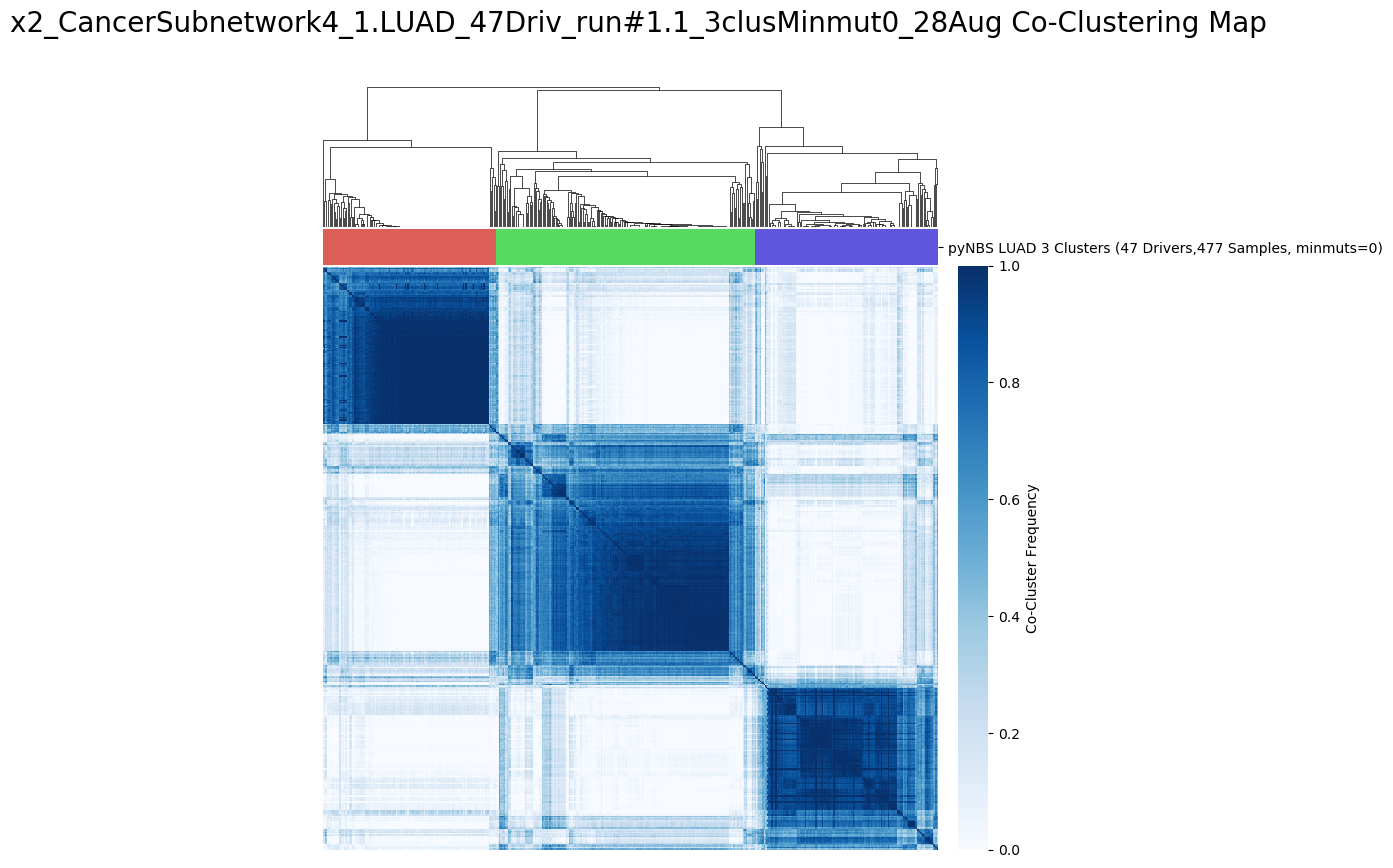

In [156]:
# Run1.1_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 477 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (47 Drivers,477 Samples, minmuts=0)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  417 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


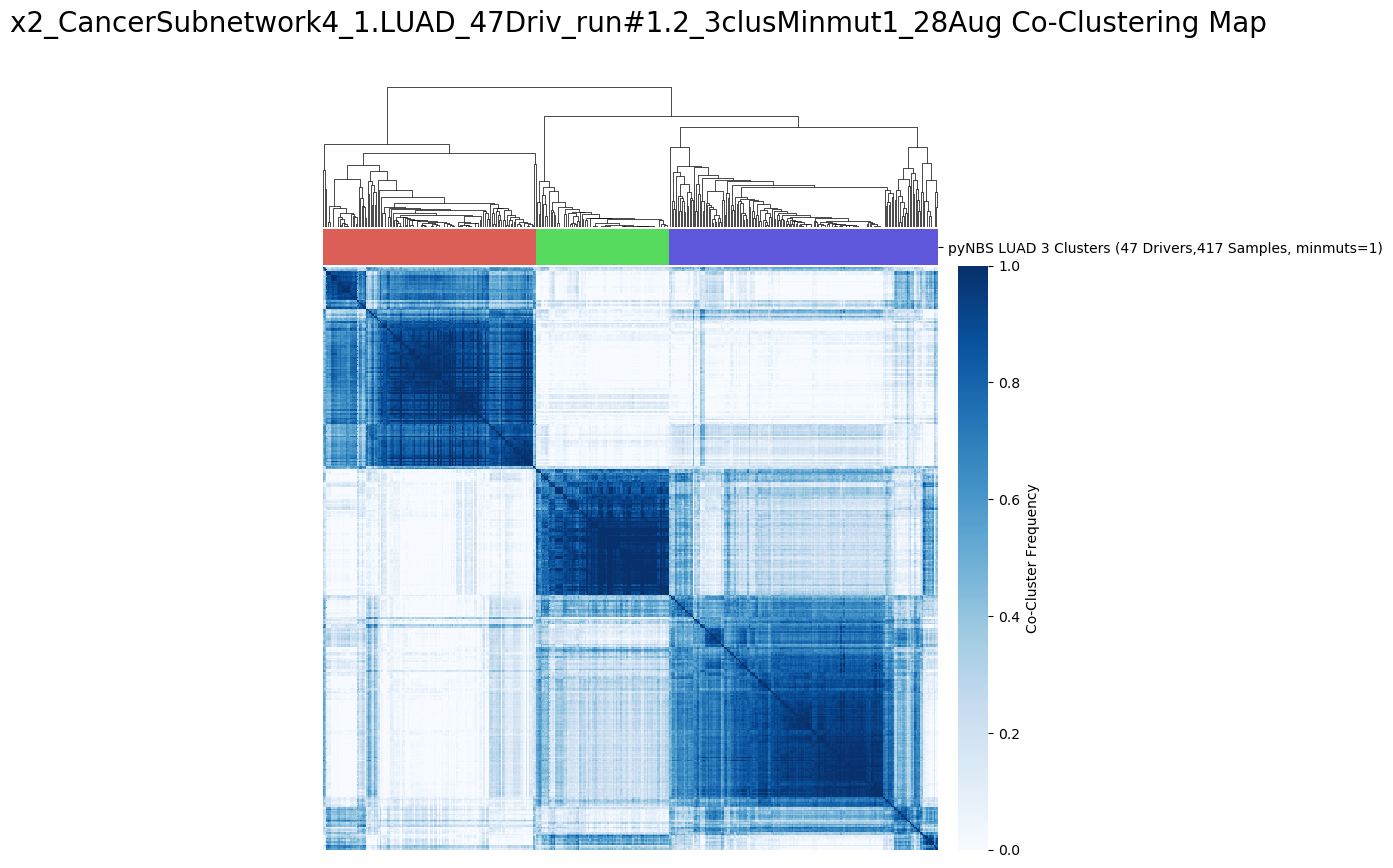

In [166]:
# Run1.2_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 417 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (47 Drivers,417 Samples, minmuts=1)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  336 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


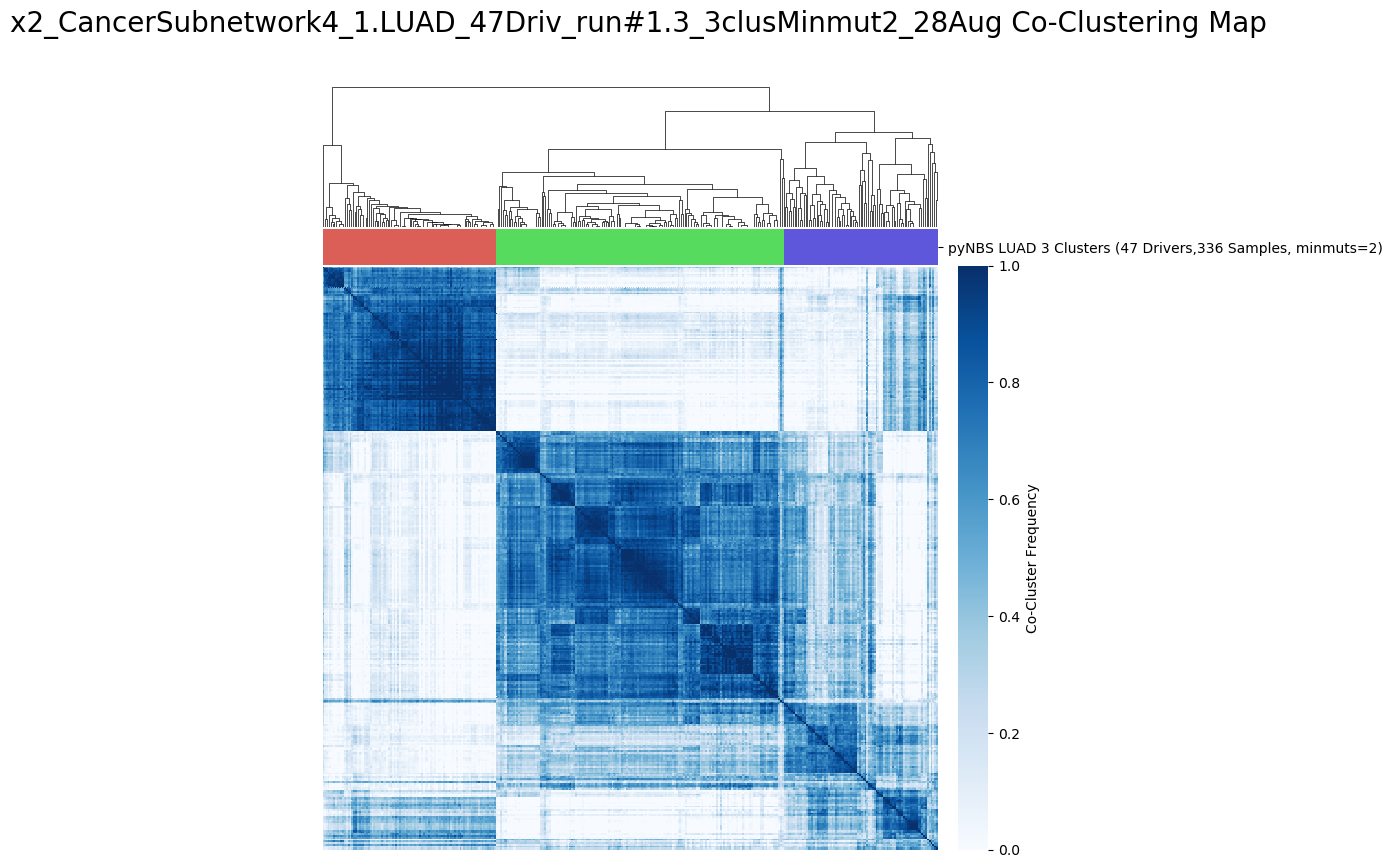

In [36]:
# Run1.3_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 336 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (47 Drivers,336 Samples, minmuts=2)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  473 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


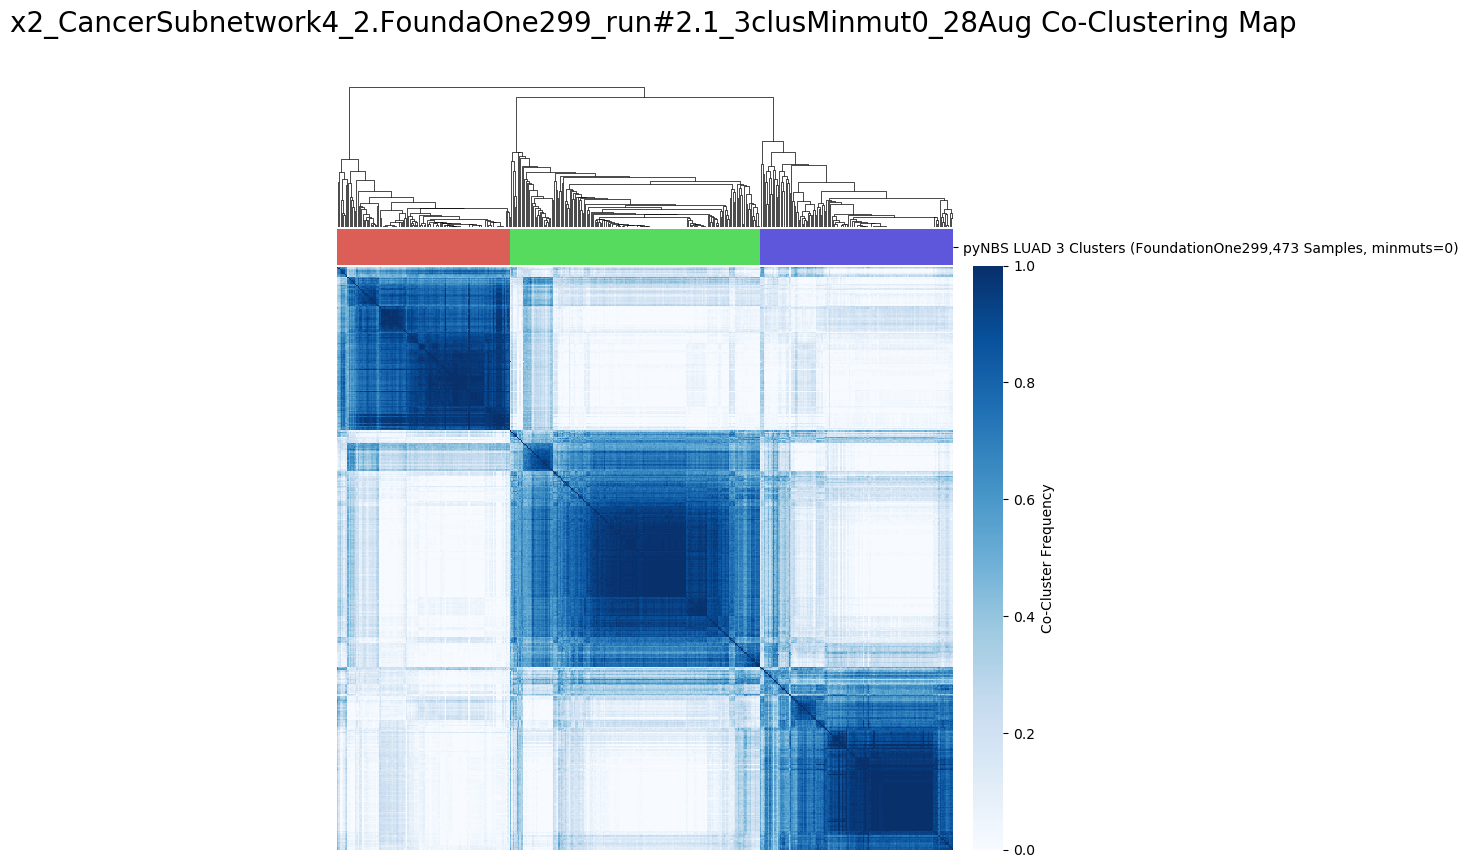

In [83]:
# Run2.1_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 473 samples remaining (from 477) 

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (FoundationOne299,473 Samples, minmuts=0)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  444 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


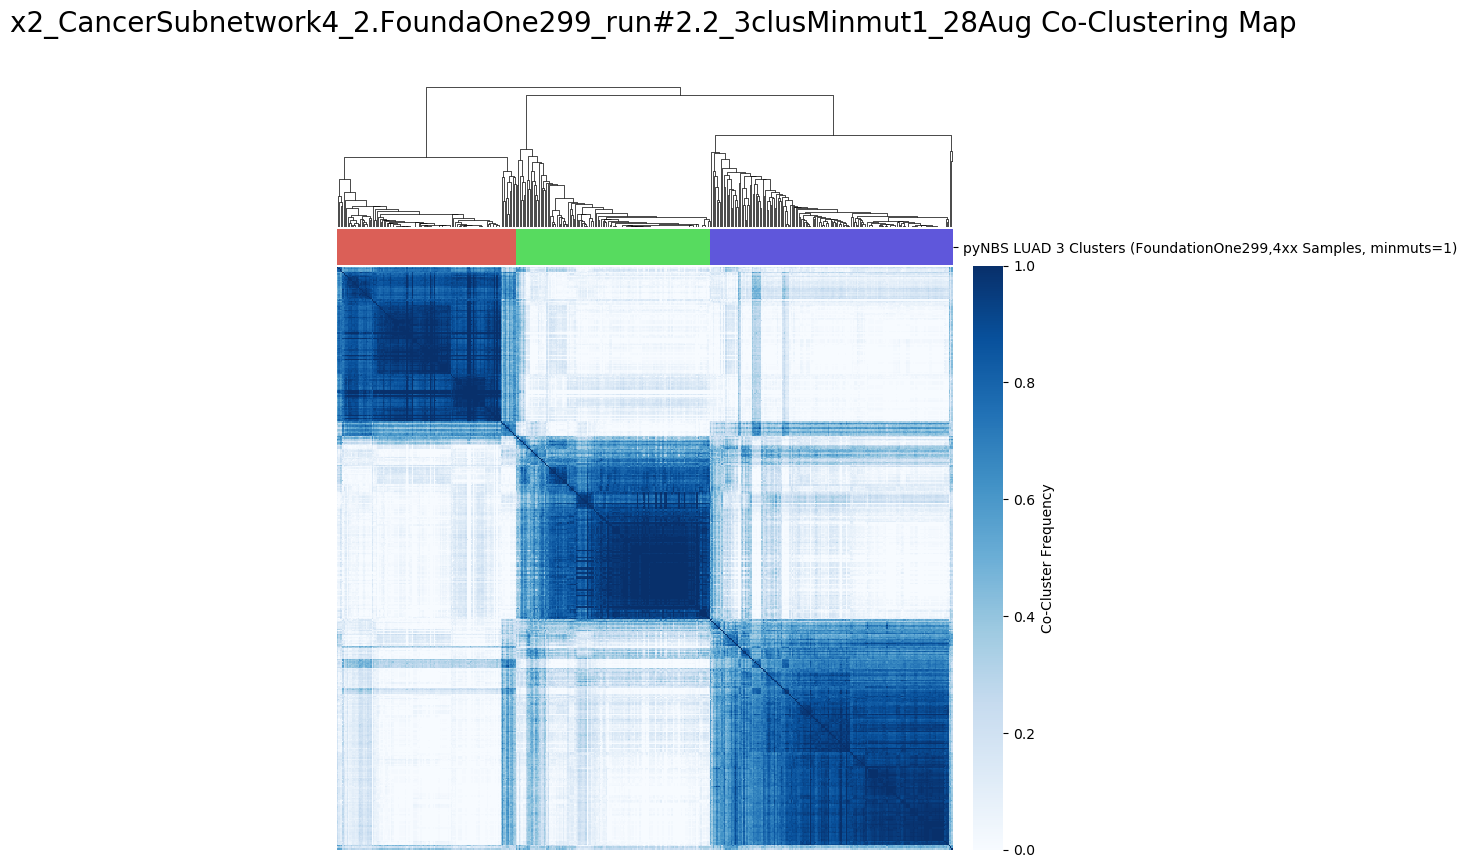

In [90]:
# Run2.2_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 444 samples remaining (from 477) 

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (FoundationOne299,4xx Samples, minmuts=1)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  393 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


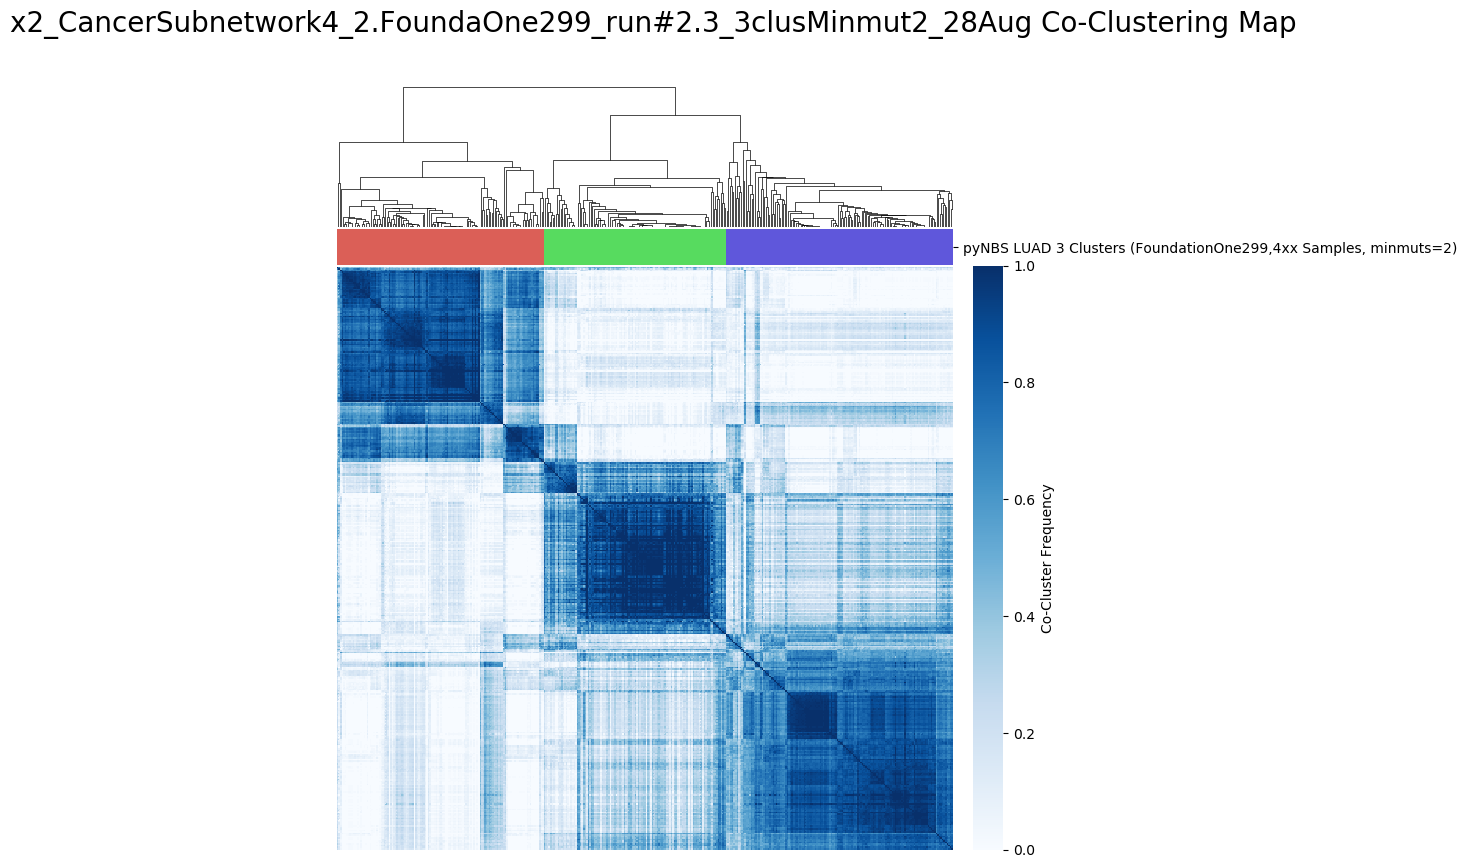

In [97]:
# Run2.3_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 393 samples remaining (from 477) 

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (FoundationOne299,4xx Samples, minmuts=2)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  447 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


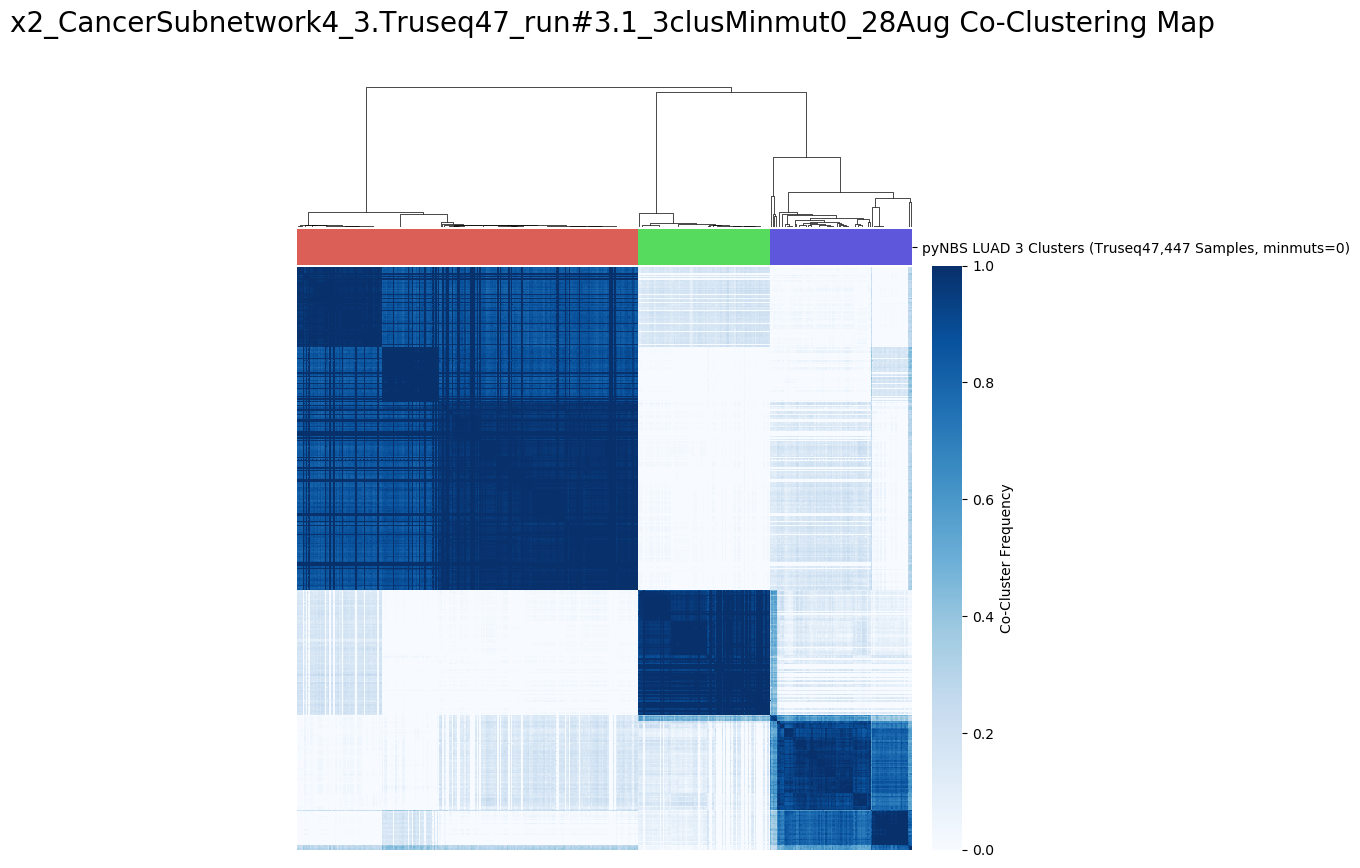

In [104]:
# Run3.1_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 447 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (Truseq47,447 Samples, minmuts=0)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  315 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


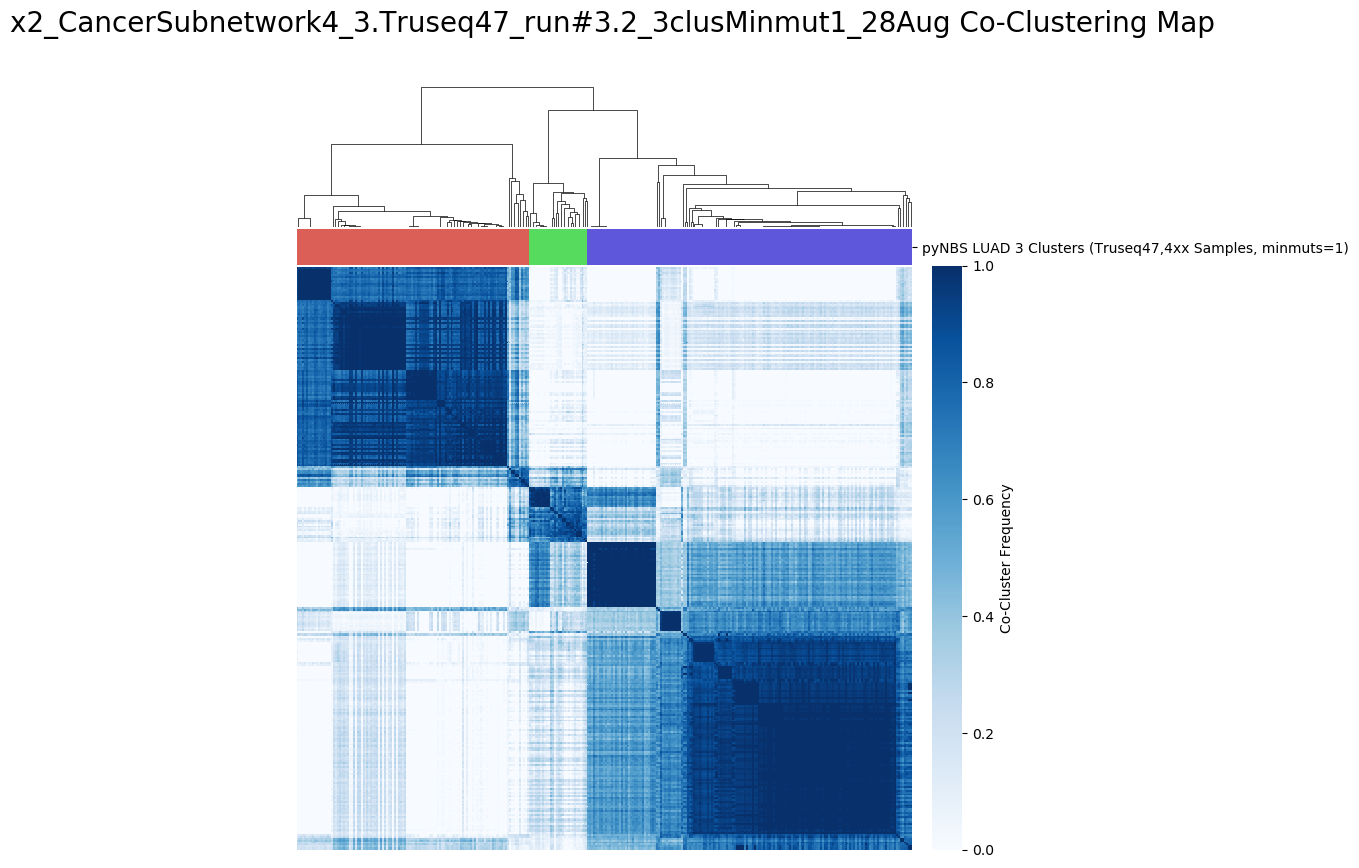

In [111]:
# Run3.2_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 315 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (Truseq47,4xx Samples, minmuts=1)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  153 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


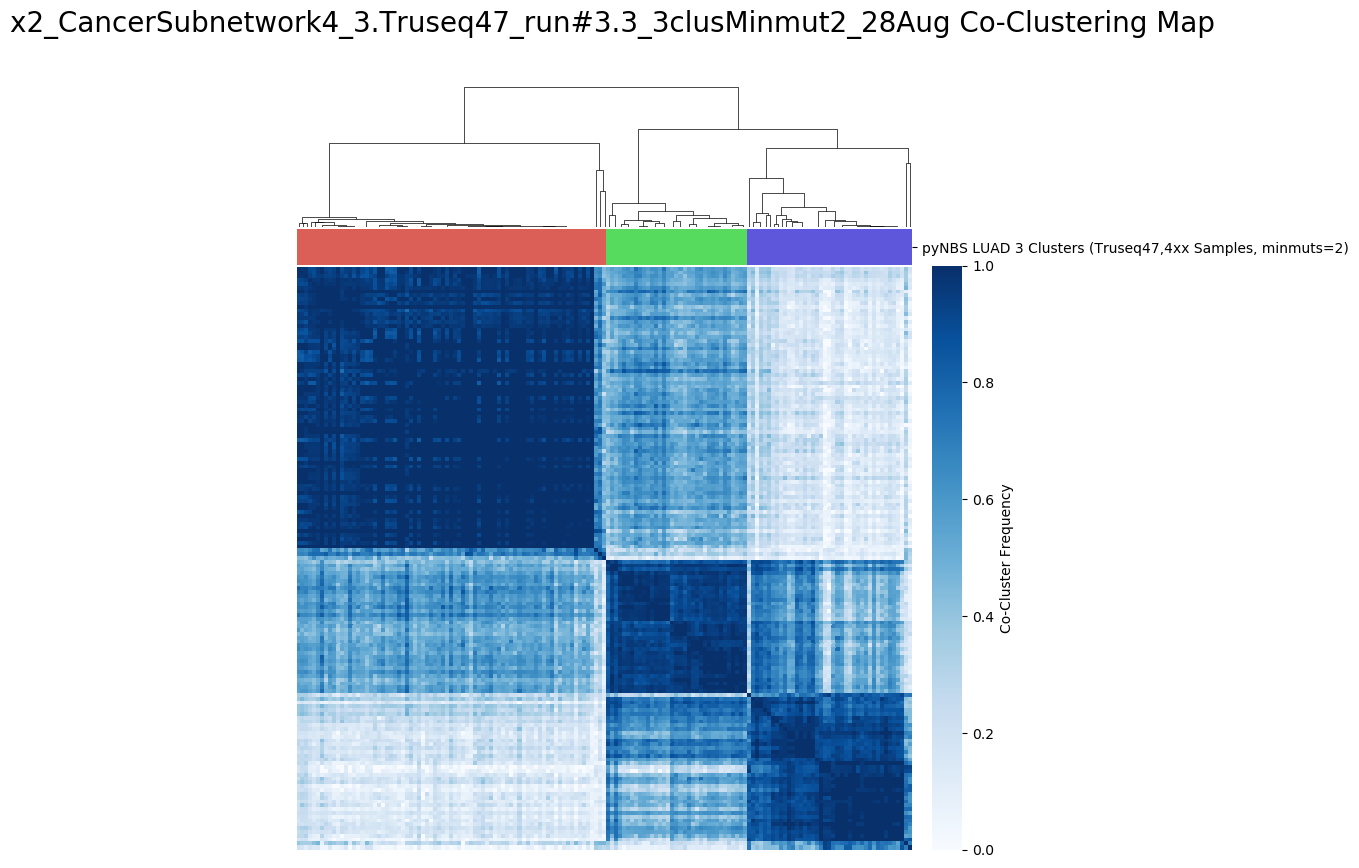

In [118]:
# Run3.3_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 153 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (Truseq47,4xx Samples, minmuts=2)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  466 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


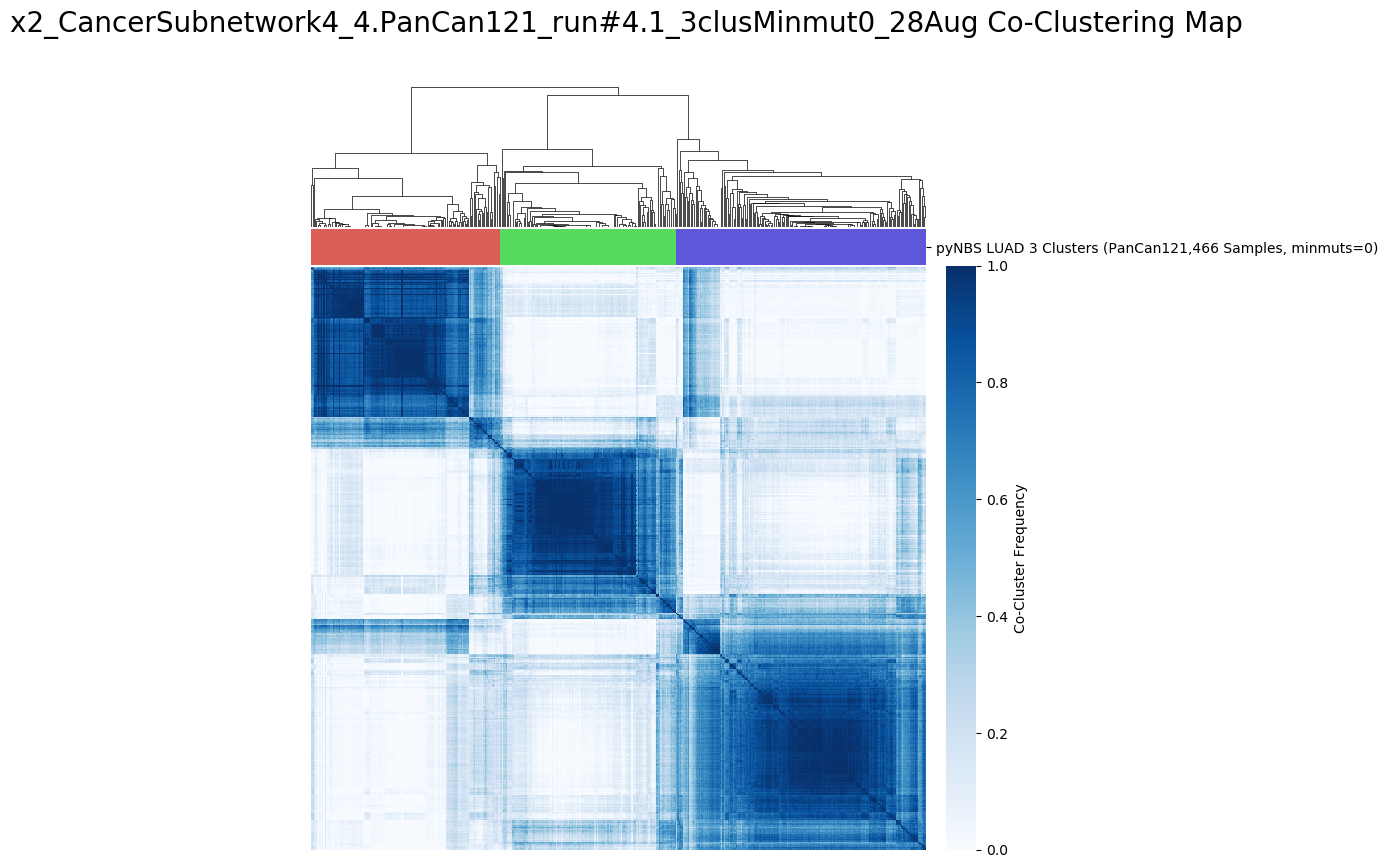

In [125]:
# Run4.1_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 466 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (PanCan121,466 Samples, minmuts=0)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  425 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


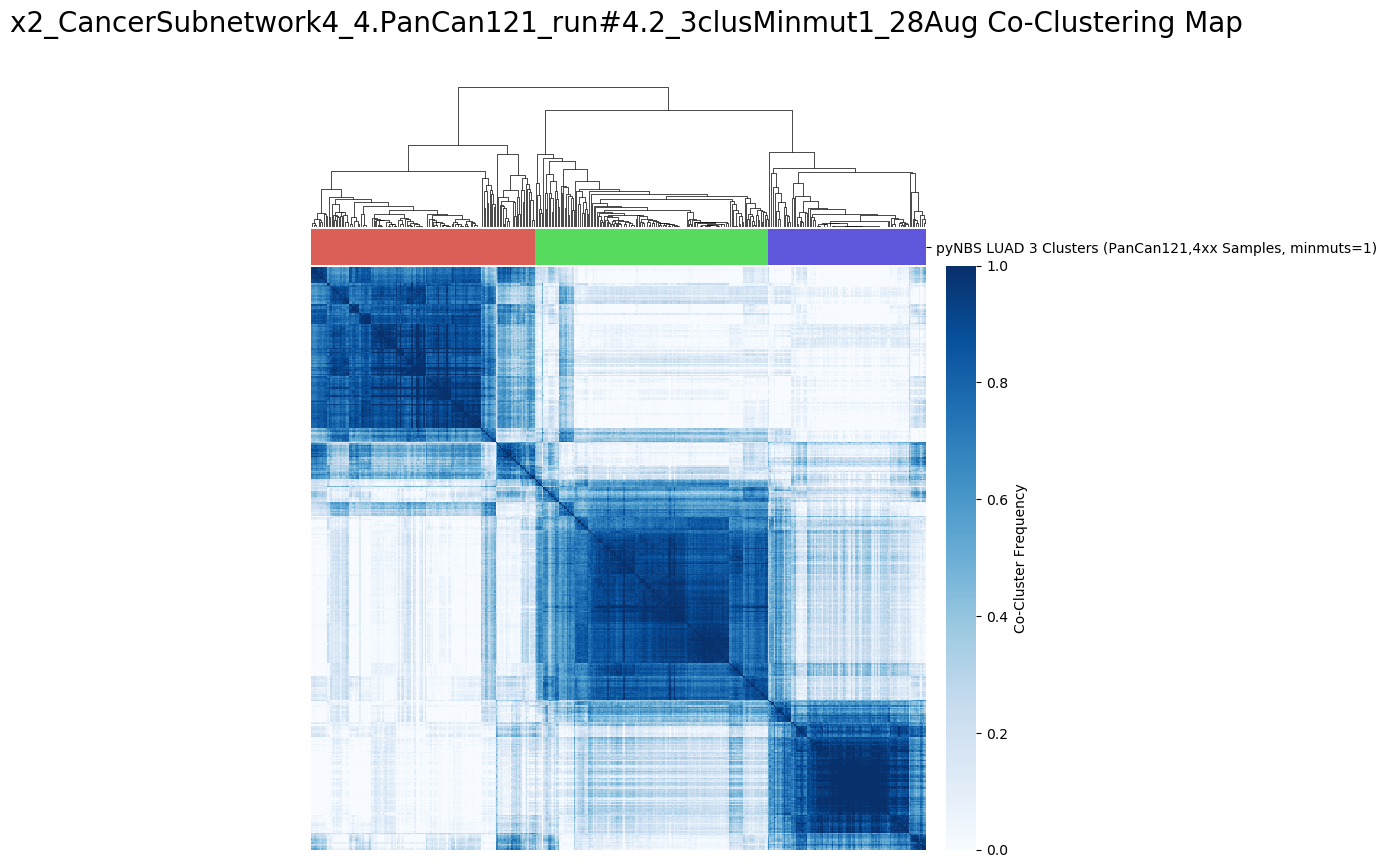

In [132]:
# Run4.2_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 425 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (PanCan121,4xx Samples, minmuts=1)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

Constructing Hlist: 100 cluster matrices,  349 samples
Hlist consensus constructed and sample clusters assigned
Co-Clustering Map plotted


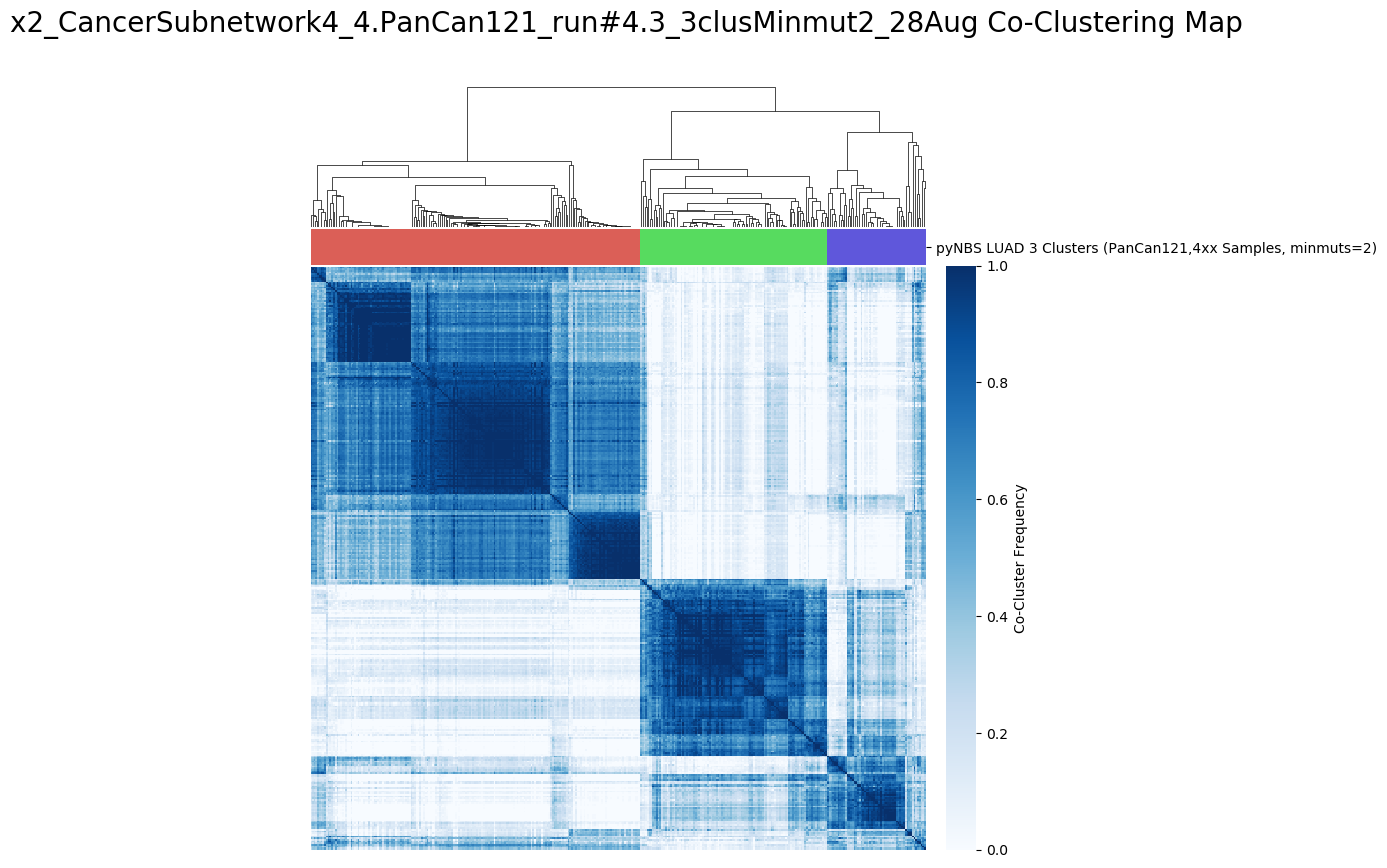

In [142]:
# Run4.3_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 349 samples remaining (from 477)

## Consensus Clustering
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

## Co-clustering map
# Assign colors to clusters from pyNBS
pyNBS_LUAD_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS LUAD 3 Clusters (PanCan121,4xx Samples, minmuts=2)')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_LUAD_clust_cmap, **save_args)

Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

### STEP6.6: Survival analysis

Multi-Class Log-Rank P: 0.680180765993
Kaplan Meier Plot constructed


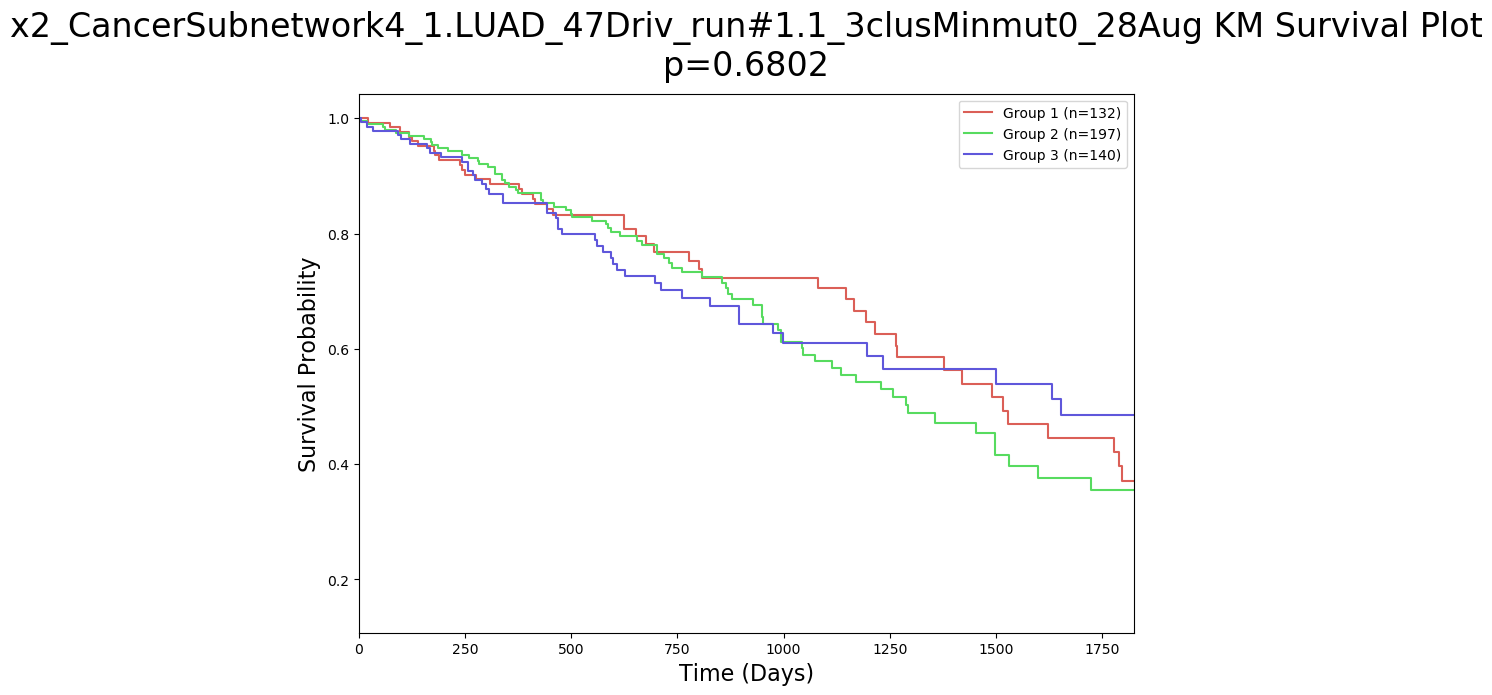

In [157]:
# Run1.1_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 477 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.903300956989
Kaplan Meier Plot constructed


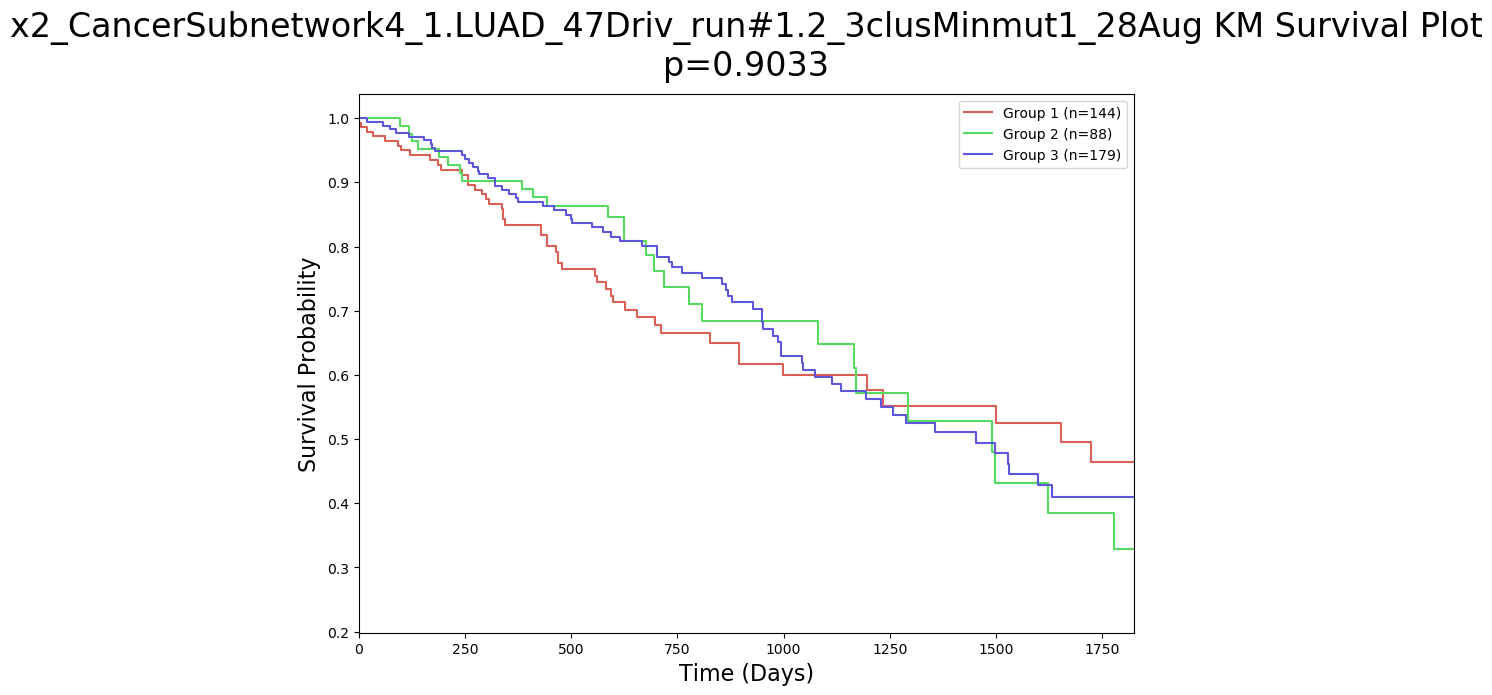

In [167]:
# Run1.2_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 417 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.185071762031
Kaplan Meier Plot constructed


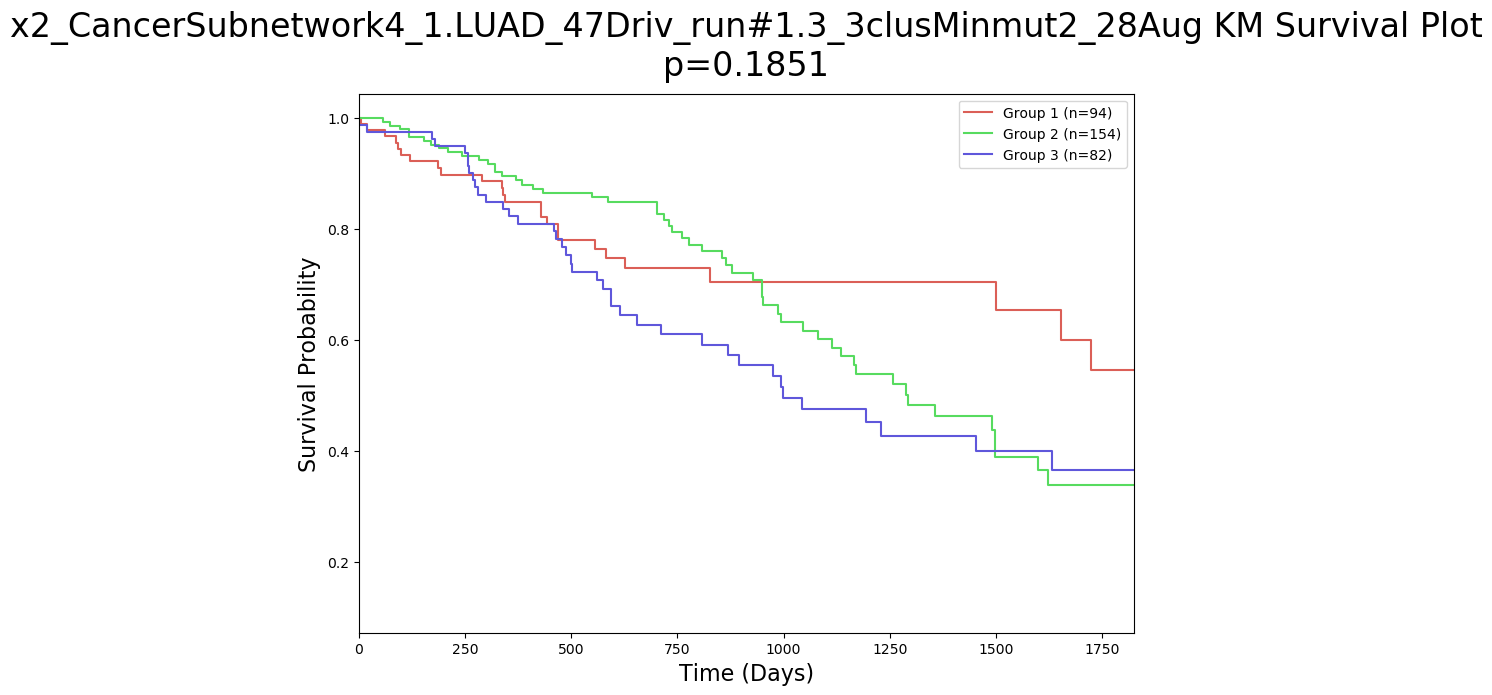

In [37]:
# Run1.3_28Aug22: Using "sm_mat1 (Driv47_477LUAD)" , 336 samples remaining (from 477)
## Network3 -> only for Driv47_477 dataset

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.340379879332
Kaplan Meier Plot constructed


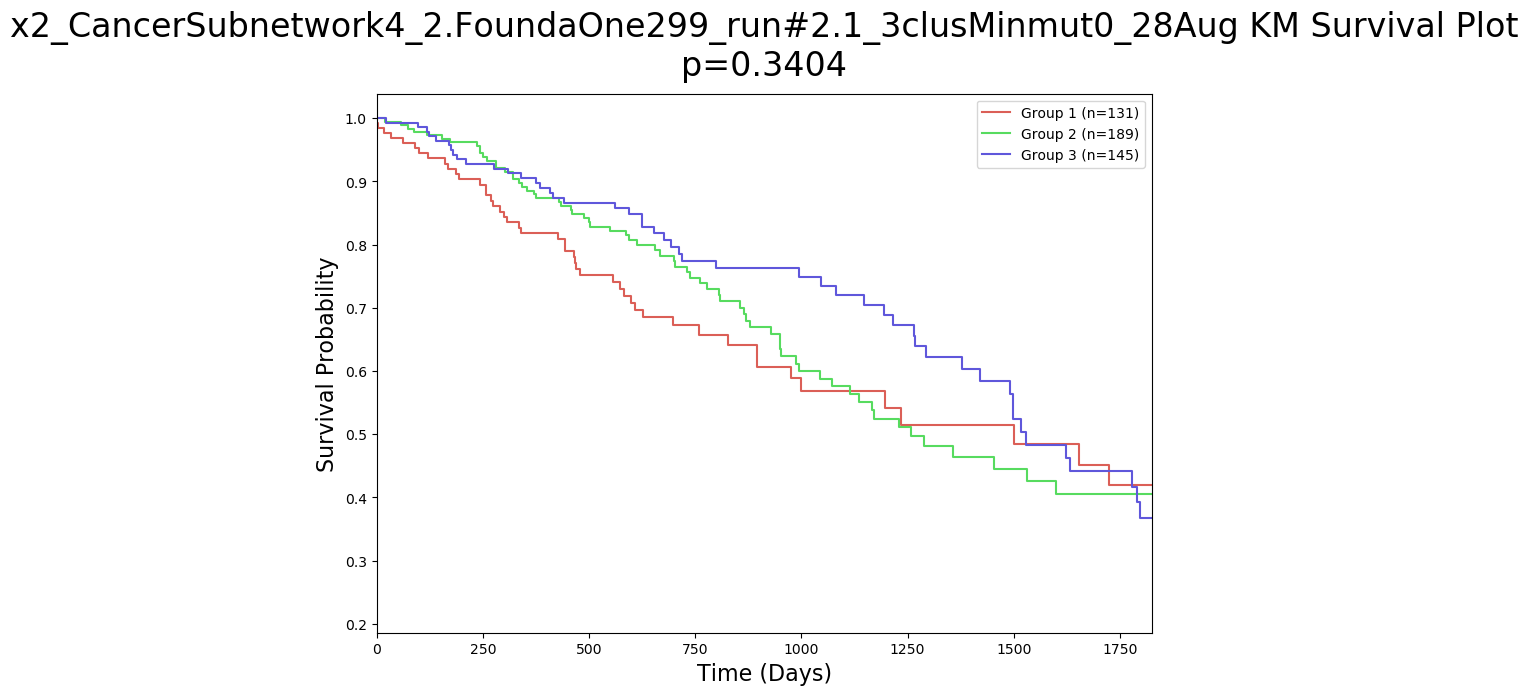

In [84]:
# Run2.1_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 473 samples remaining (from 477) 

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.453942859039
Kaplan Meier Plot constructed


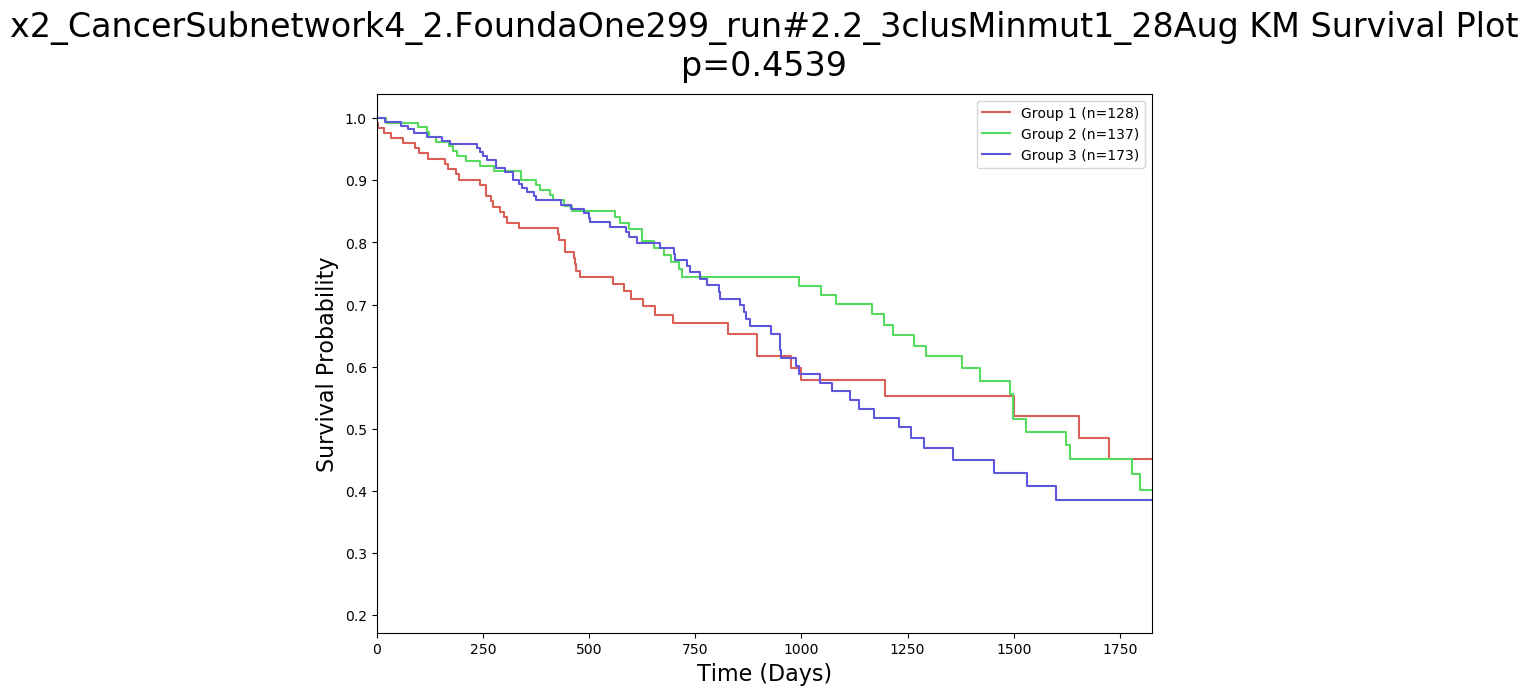

In [91]:
# Run2.2_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 444 samples remaining (from 477) 

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.451866684146
Kaplan Meier Plot constructed


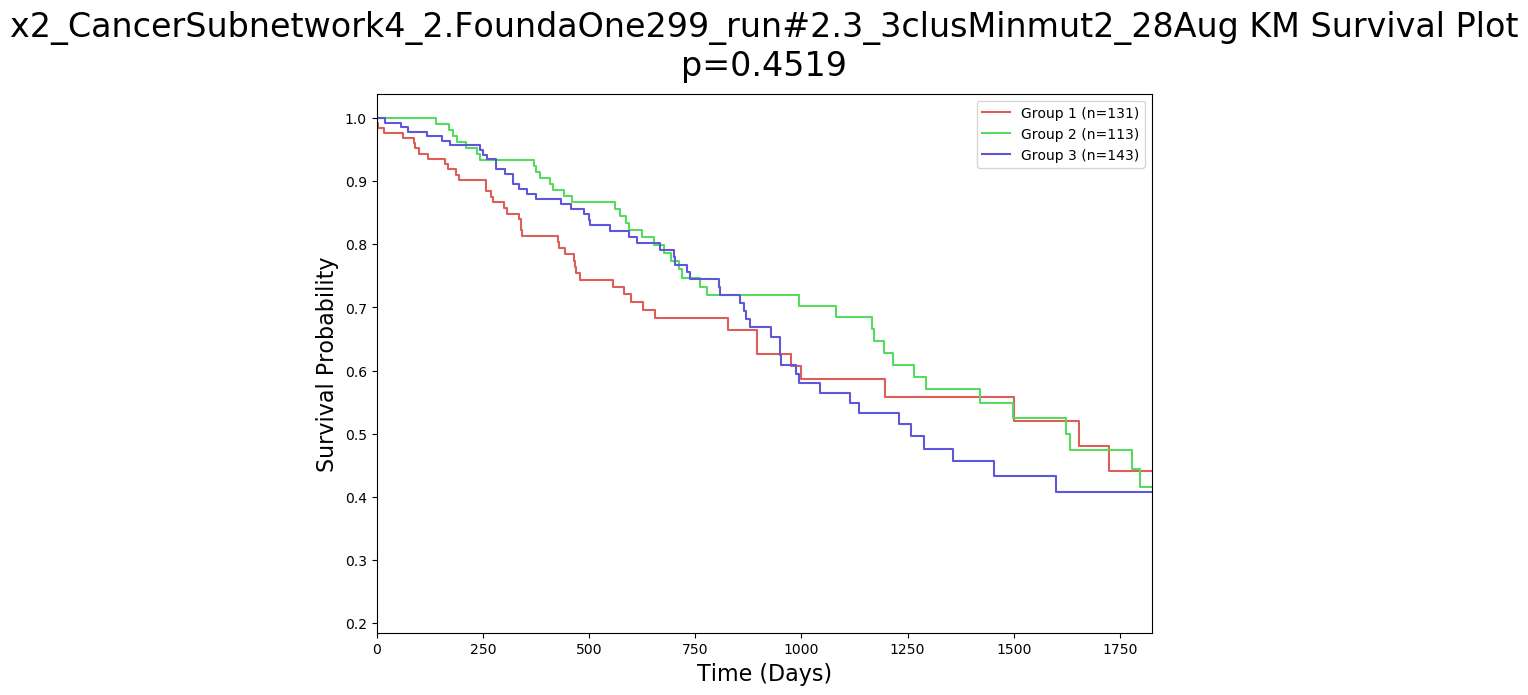

In [98]:
# Run2.3_28Aug22: Using "sm_mat2 (FoundationOne299_473LUAD)", 393 samples remaining (from 477) 

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.594094161225
Kaplan Meier Plot constructed


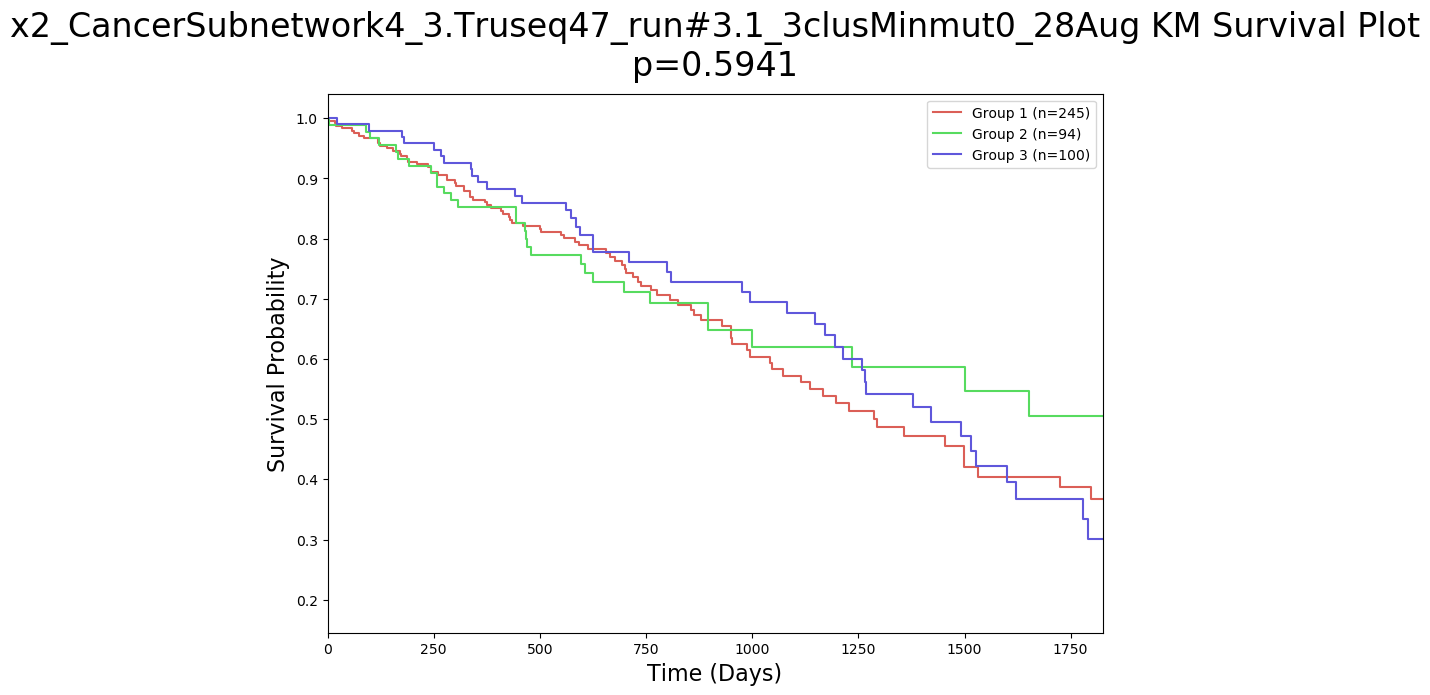

In [105]:
# Run3.1_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 447 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.212049801828
Kaplan Meier Plot constructed


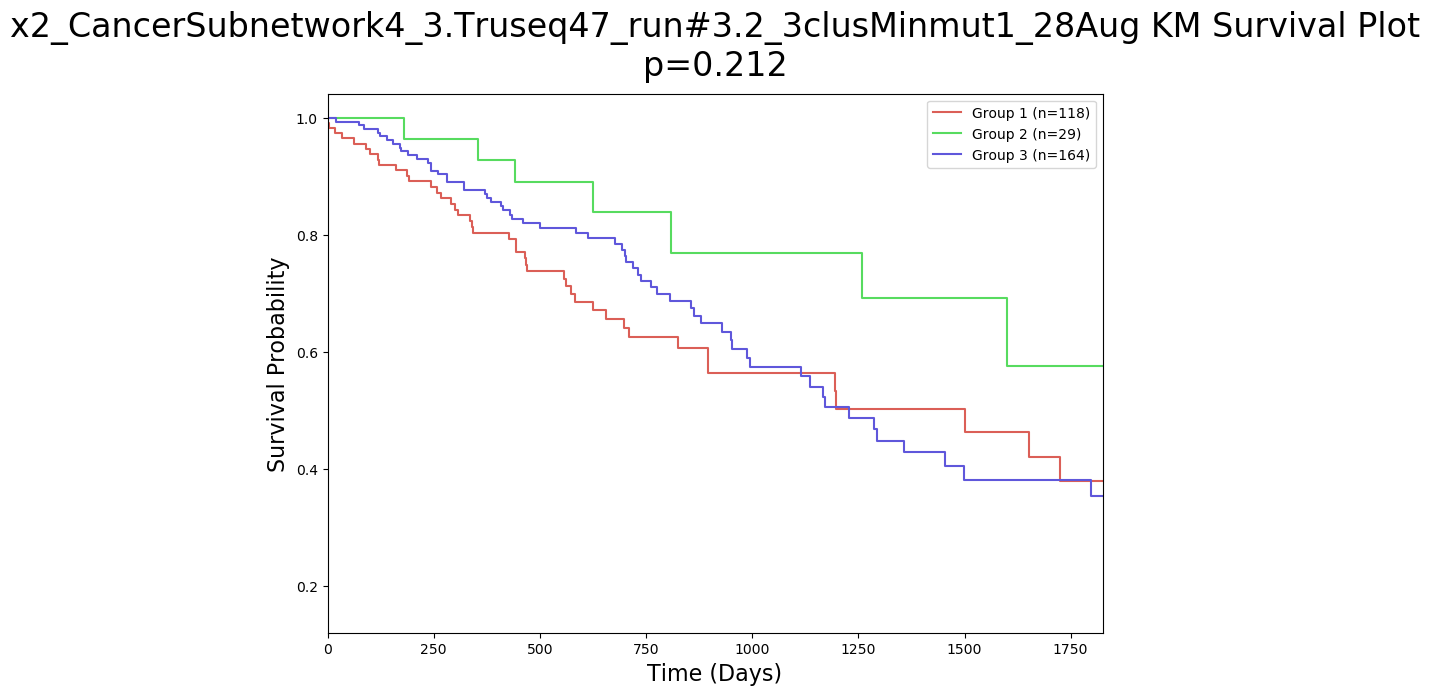

In [112]:
# Run3.2_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 315 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.429601088539
Kaplan Meier Plot constructed


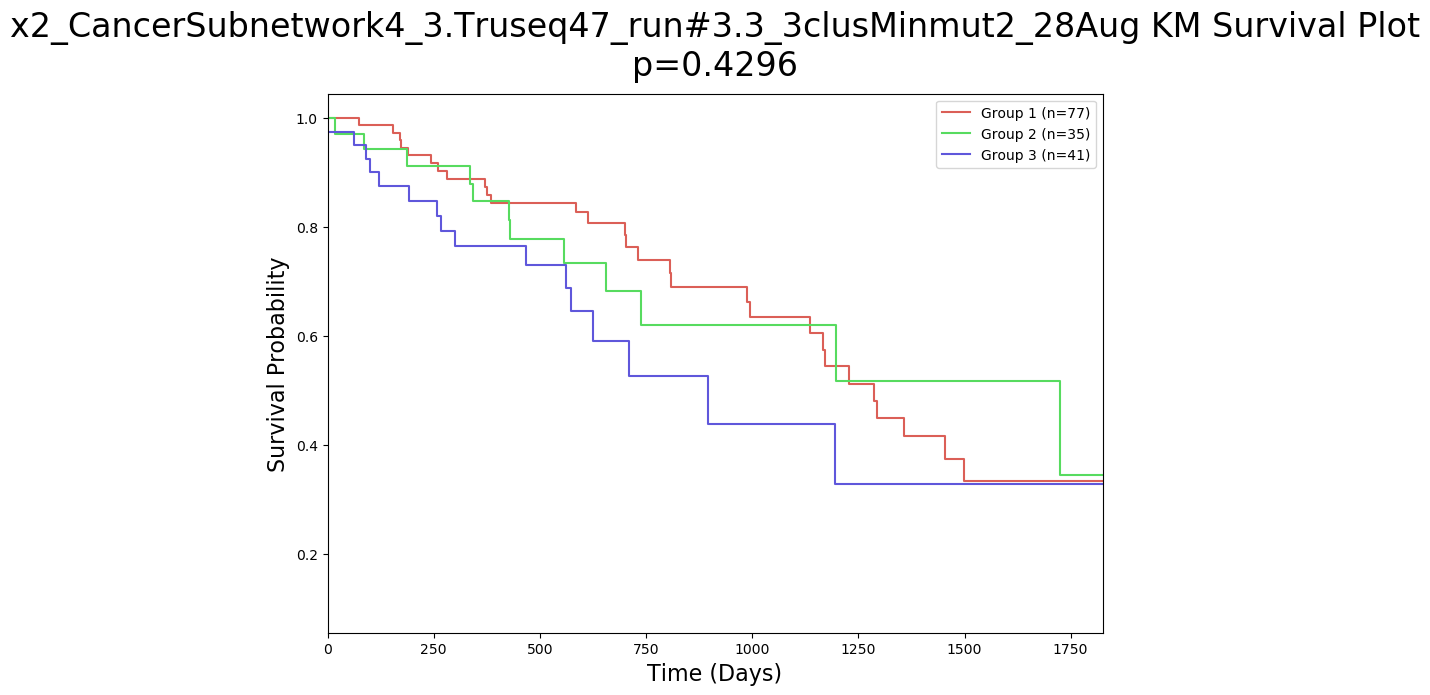

In [119]:
# Run3.3_28Aug22: Using "sm_mat3 (Truseq47_447LUAD)", 153 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.939268506112
Kaplan Meier Plot constructed


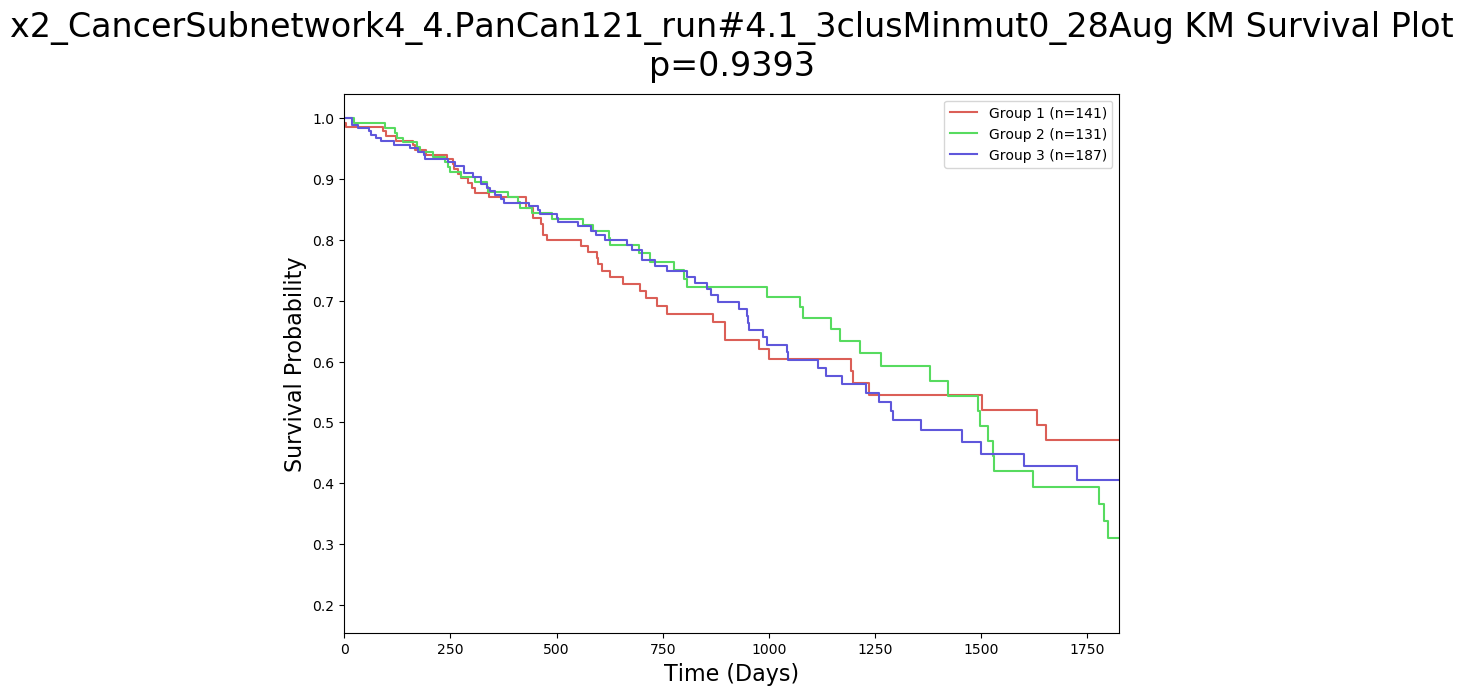

In [126]:
# Run4.1_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 466 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.990863663818
Kaplan Meier Plot constructed


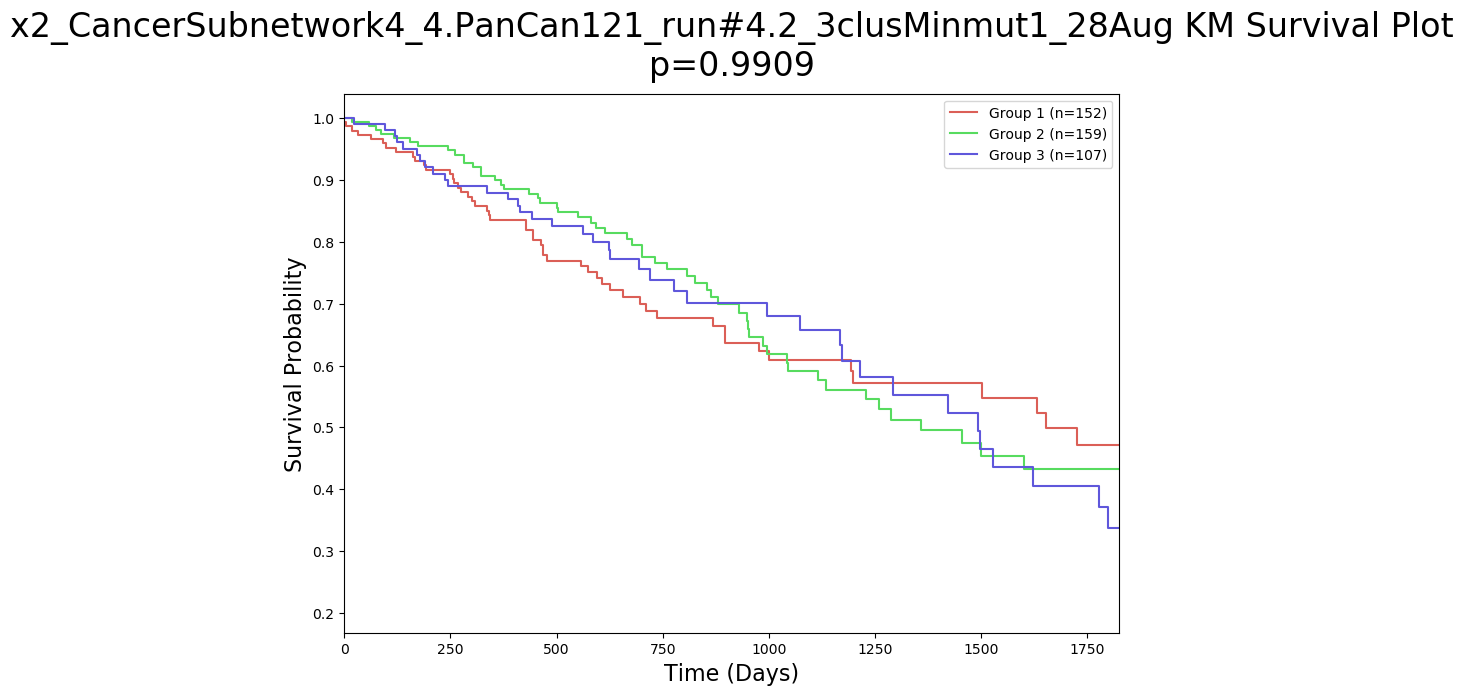

In [133]:
# Run4.2_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 425 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)

Multi-Class Log-Rank P: 0.957661342671
Kaplan Meier Plot constructed


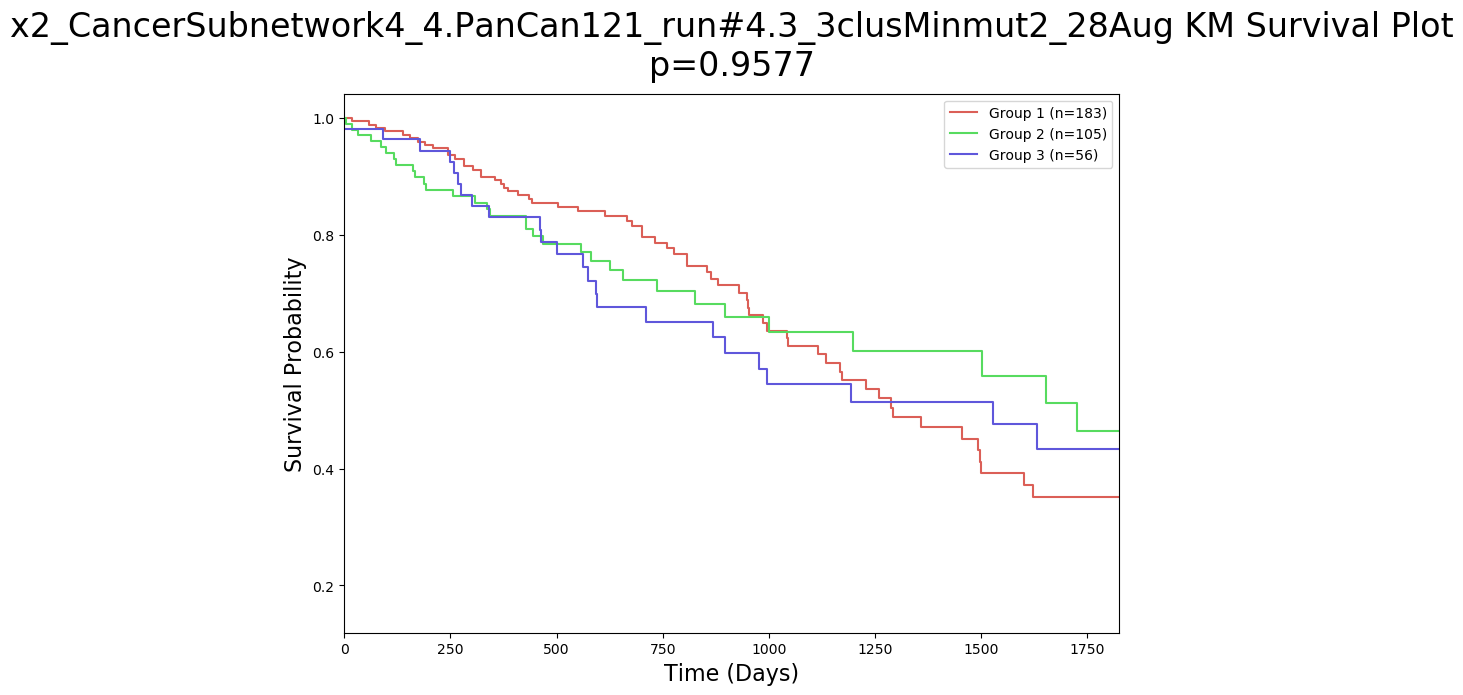

In [143]:
# Run4.3_28Aug22: Using "sm_mat4 (PanCan121_466LUAD)", 349 samples remaining (from 477)

surv_data = './Example_Data/Clinical_Files/1.1_OUT_LUADmc3_surviv_reformat.txt'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)